In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats

In [10]:
# Define base paths
data_dir = "../../data/processed"
Images_dir = "../../images/EDA_2"
soil_file_path = os.path.join(data_dir, "soil.csv")

In [11]:
soil_df = pd.read_csv(soil_file_path)

## General inspection

In [12]:
soil_df.head()

,longitude,latitude,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,BULK,REF_BULK,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
0,8.937500,37.537500,11.0,40.0,41.0,19.0,9.0,M,1.47,1.69,...,11.0,26.0,6.0,5.0,47.0,21.0,1.0,0.0,0.1,0.0
1,8.937500,37.537500,9.0,25.0,53.0,22.0,7.0,M,1.46,1.73,...,15.0,51.0,14.0,12.0,65.0,26.0,3.0,0.0,0.1,0.0
2,8.945833,37.537500,9.0,87.0,9.0,4.0,12.0,C,1.44,1.20,...,4.0,33.0,3.0,3.0,76.0,6.0,2.0,0.0,0.1,0.0
3,8.945833,37.537500,5.0,33.0,31.0,36.0,5.0,F,1.35,1.90,...,20.0,34.0,15.0,17.0,82.0,0.0,1.0,0.0,1.6,1.0
4,8.912500,37.529167,11.0,40.0,41.0,19.0,9.0,M,1.47,1.69,...,11.0,26.0,6.0,5.0,47.0,21.0,1.0,0.0,0.1,0.0


In [13]:
print("shape:", soil_df.shape)
print("columns:", soil_df.columns)
print("missing values:\n", soil_df.isnull().sum())

shape: (5774004, 24)
columns: Index(['longitude', 'latitude', 'COARSE', 'SAND', 'SILT', 'CLAY',
       'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON',
       'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
       'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'],
      dtype='object')
missing values:
 longitude        0
latitude         0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64


In [15]:
for column in soil_df.columns:
    print("nb unique values for", column, ":", soil_df[column].nunique(),"type:", soil_df[column].dtype)

nb unique values for longitude : 2478 type: float64
nb unique values for latitude : 2210 type: float64
nb unique values for COARSE : 25 type: float64
nb unique values for SAND : 44 type: float64
nb unique values for SILT : 31 type: float64
nb unique values for CLAY : 32 type: float64
nb unique values for TEXTURE_USDA : 7 type: float64
nb unique values for TEXTURE_SOTER : 3 type: object
nb unique values for BULK : 42 type: float64
nb unique values for REF_BULK : 41 type: float64
nb unique values for ORG_CARBON : 87 type: float64
nb unique values for PH_WATER : 31 type: float64
nb unique values for TOTAL_N : 70 type: float64
nb unique values for CN_RATIO : 10 type: float64
nb unique values for CEC_SOIL : 29 type: float64
nb unique values for CEC_CLAY : 41 type: float64
nb unique values for CEC_EFF : 47 type: float64
nb unique values for TEB : 50 type: float64
nb unique values for BSAT : 31 type: float64
nb unique values for ALUM_SAT : 12 type: float64
nb unique values for ESP : 19 type: 

## Univariate Analysis

In [20]:
# =========================
# 🌾 STYLE CONFIGURATION
# =========================
sns.set_theme(
    style="whitegrid",
    font="DejaVu Sans",
    rc={
        "axes.titlesize": 10,
        "axes.labelsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
    }
)

# Define earthy color palette
EARTH_COLORS = {
    "sand": "#D4A373",    # soft sand beige
    "soil": "#7D5A50",    # dark soil brown
    "clay": "#A0522D",    # sienna brown
    "carbon": "#8B5F49",  # rich dark brown
    "neutral": "#B5651D"  # medium brown
}

# =========================
# 🌿 UNIVARIATE FUNCTION
# =========================
def plot_univariate_distribution(column, dtype, color_key="soil"):
    """
    Univariate analysis for a soil property column.
    - Detects outliers and prints key stats.
    - Histogram + boxplot (numerical)
    - Clean countplot (categorical)
    - Earth-tone aesthetic for soil-related variables.
    """

    color = EARTH_COLORS.get(color_key, "#7D5A50")
    print(f"\n🌱  Univariate analysis for '{column}'\n" + "-"*60)

    # Handle numerical columns
    if dtype == "numerical":
        col_data = soil_df[column].dropna()

        # --- Summary stats ---
        print("📊 Summary statistics:")
        print(col_data.describe())

        # --- Outlier detection ---
        Q1, Q3 = col_data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = col_data[(col_data < lower) | (col_data > upper)]
        pct_outliers = len(outliers) / len(col_data) * 100

        print(f"\n🚨 Outliers: {len(outliers)} ({pct_outliers:.2f}%)")
        if not outliers.empty:
            print(f"   - Low outliers:  {(outliers < lower).sum()}")
            print(f"   - High outliers: {(outliers > upper).sum()}")

        # --- Plot ---
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
        sns.histplot(col_data, bins='sturges', color=color, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")
        axes[0].set_xlabel(column)
        axes[0].set_ylabel("Frequency")

        sns.boxplot(x=col_data, color=color, ax=axes[1])
        axes[1].set_title(f"Boxplot of {column}")
        axes[1].set_xlabel(column)

        plt.suptitle(f"{column} — Univariate Distribution", fontsize=13, fontweight='bold')
        plt.savefig(os.path.join(Images_dir, f"soil_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

    # Handle categorical columns
    else:
        col_data = soil_df[column].dropna()
        order = col_data.value_counts().index

        plt.figure(figsize=(10, 4))
        sns.countplot(
            data=soil_df,
            x=column,
            order=order,
            hue=column,          # ✅ prevents palette warning
            palette=[color],     # single-tone aesthetic
            legend=False,
            edgecolor='black'
        )
        plt.xticks(rotation=60, ha='right')
        plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_univariate_{column}.png"), dpi=300, bbox_inches='tight')
        plt.show()

        print(f"🏷️ Mode of '{column}': {soil_df[column].mode(dropna=True).iloc[0]}")


In [17]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [21]:
categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
numerical_cols = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
    'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
    'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
]



🌱  Univariate analysis for 'TEXTURE_USDA'
------------------------------------------------------------


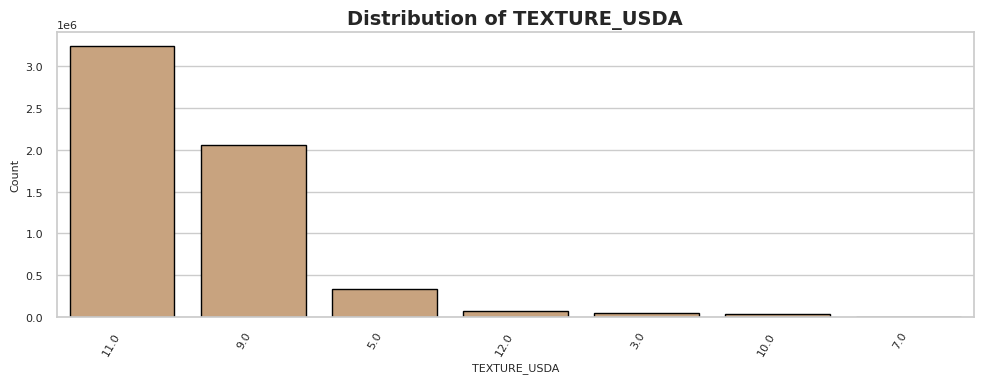

🏷️ Mode of 'TEXTURE_USDA': 11.0

🌱  Univariate analysis for 'TEXTURE_SOTER'
------------------------------------------------------------


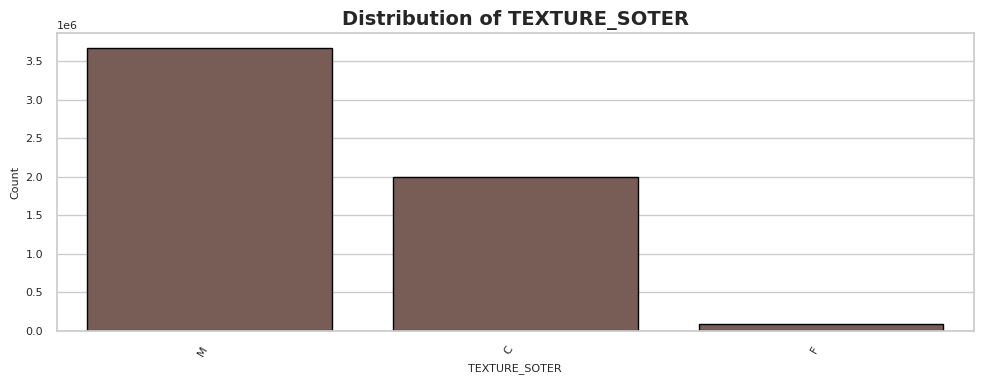

🏷️ Mode of 'TEXTURE_SOTER': M

🌱  Univariate analysis for 'COARSE'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.316175e+01
std      5.792844e+00
min      2.000000e+00
25%      1.100000e+01
50%      1.200000e+01
75%      1.800000e+01
max      4.600000e+01
Name: COARSE, dtype: float64

🚨 Outliers: 25276 (0.44%)
   - Low outliers:  0
   - High outliers: 25276


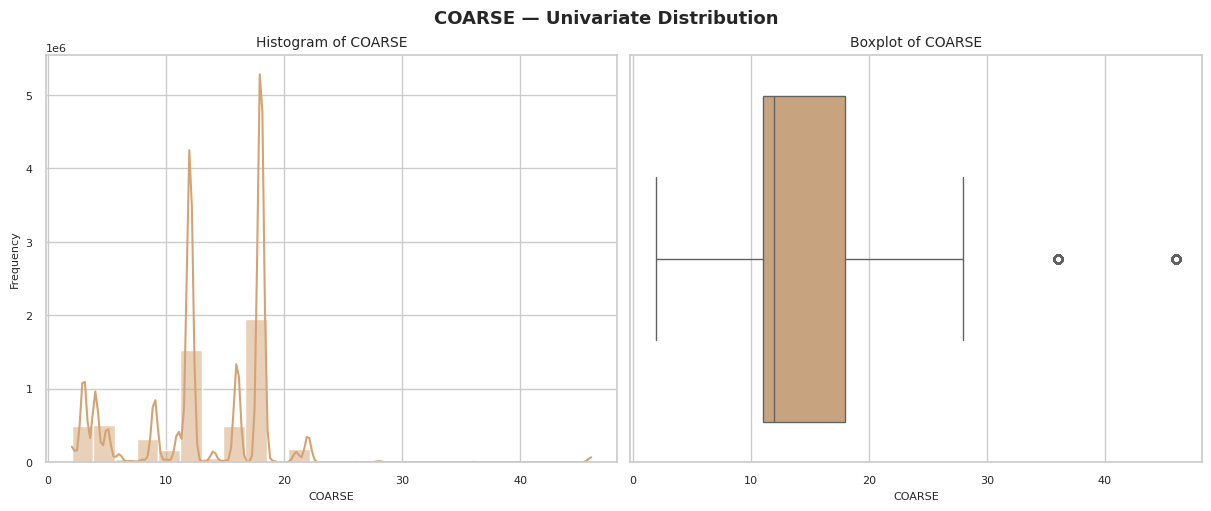


🌱  Univariate analysis for 'SAND'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     5.487489e+01
std      1.116848e+01
min      1.300000e+01
25%      4.700000e+01
50%      5.700000e+01
75%      6.600000e+01
max      9.000000e+01
Name: SAND, dtype: float64

🚨 Outliers: 36214 (0.63%)
   - Low outliers:  36214
   - High outliers: 0


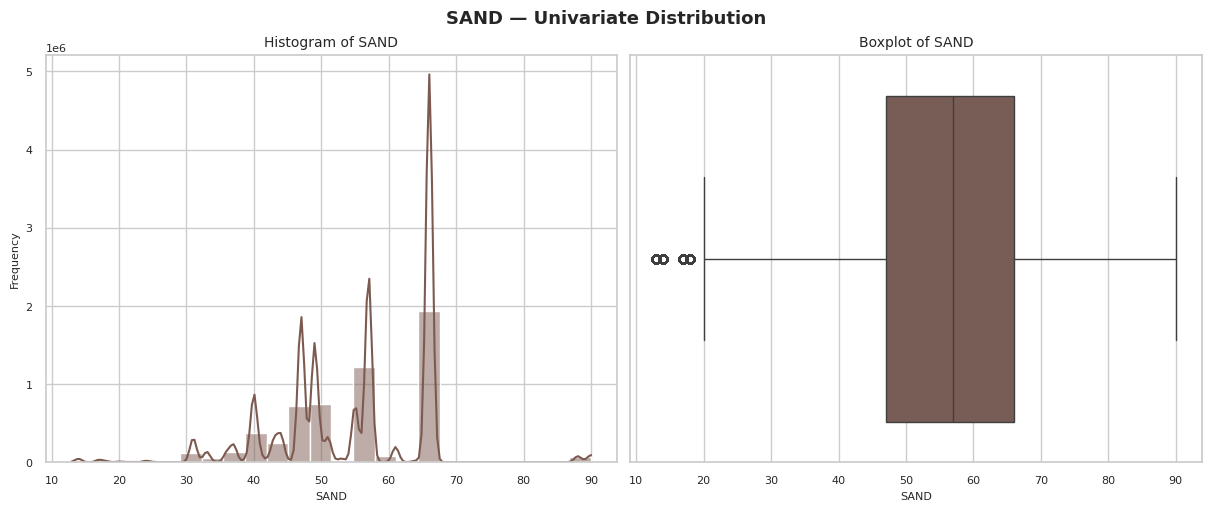


🌱  Univariate analysis for 'SILT'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     2.782647e+01
std      6.690776e+00
min      5.000000e+00
25%      2.200000e+01
50%      2.700000e+01
75%      3.300000e+01
max      5.300000e+01
Name: SILT, dtype: float64

🚨 Outliers: 42340 (0.73%)
   - Low outliers:  40922
   - High outliers: 1418


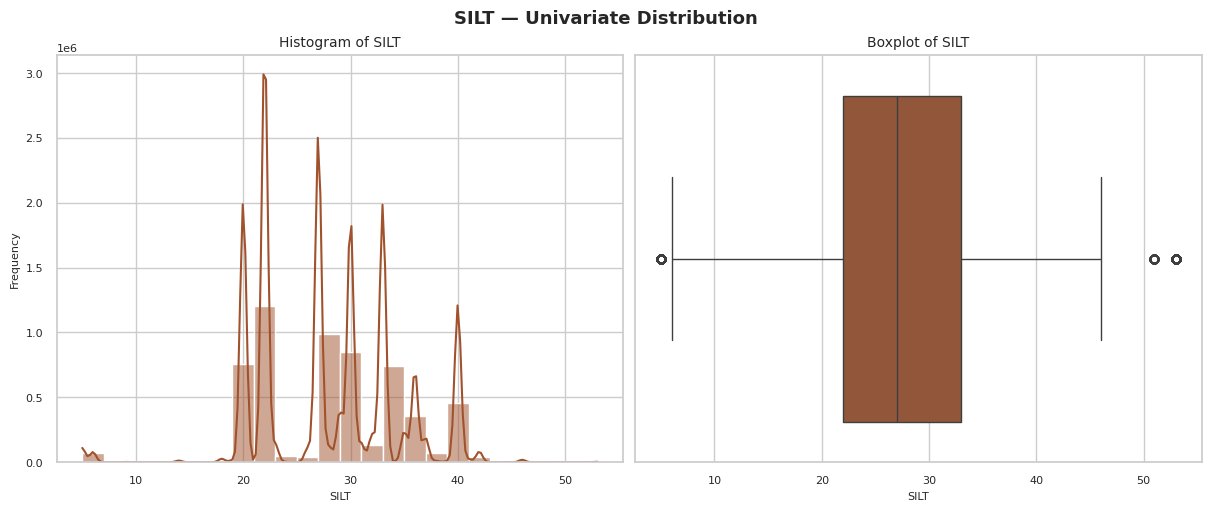


🌱  Univariate analysis for 'CLAY'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.729864e+01
std      5.786591e+00
min      4.000000e+00
25%      1.400000e+01
50%      1.600000e+01
75%      2.000000e+01
max      5.500000e+01
Name: CLAY, dtype: float64

🚨 Outliers: 236605 (4.10%)
   - Low outliers:  900
   - High outliers: 235705


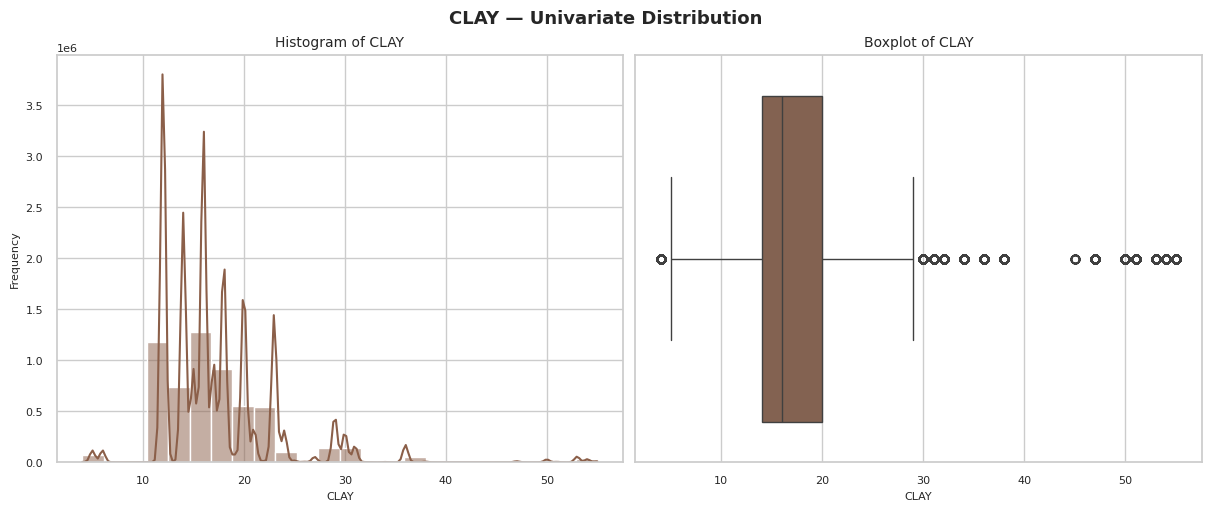


🌱  Univariate analysis for 'BULK'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.420895e+00
std      5.609279e-02
min      9.900000e-01
25%      1.370000e+00
50%      1.430000e+00
75%      1.450000e+00
max      1.760000e+00
Name: BULK, dtype: float64

🚨 Outliers: 116265 (2.01%)
   - Low outliers:  32008
   - High outliers: 84257


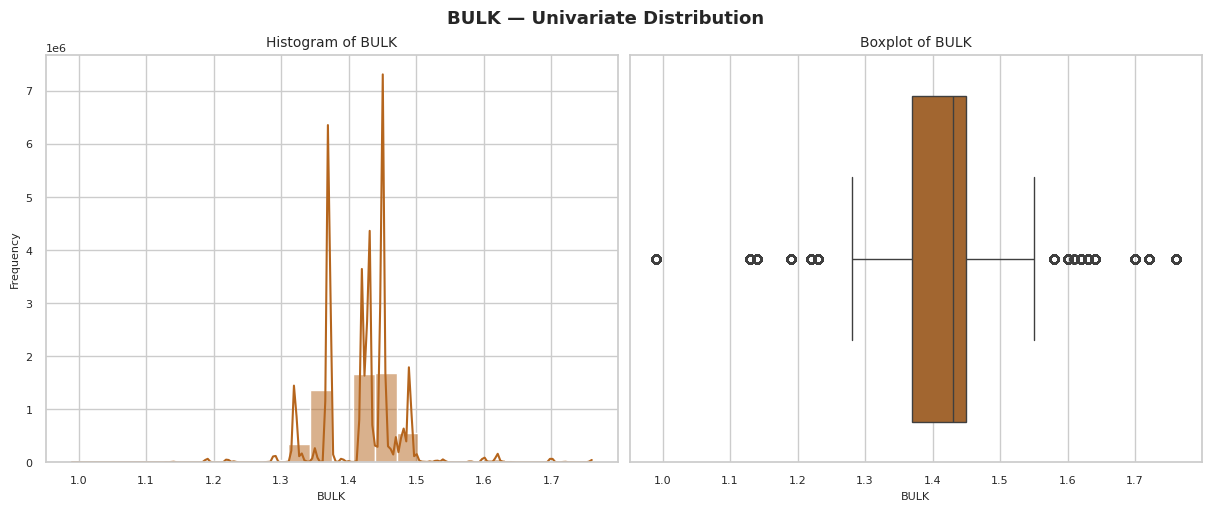


🌱  Univariate analysis for 'REF_BULK'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.657159e+00
std      9.204897e-02
min      1.200000e+00
25%      1.610000e+00
50%      1.650000e+00
75%      1.710000e+00
max      2.040000e+00
Name: REF_BULK, dtype: float64

🚨 Outliers: 167233 (2.90%)
   - Low outliers:  71533
   - High outliers: 95700


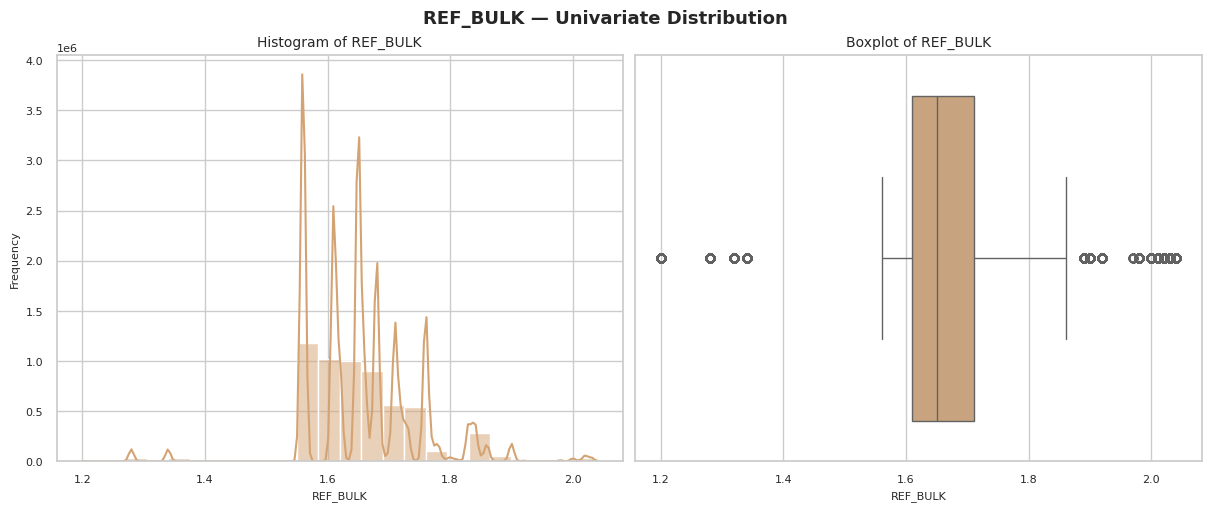


🌱  Univariate analysis for 'ORG_CARBON'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     7.451643e-01
std      4.448716e-01
min      2.420000e-01
25%      5.760000e-01
50%      6.840000e-01
75%      7.110000e-01
max      7.326000e+00
Name: ORG_CARBON, dtype: float64

🚨 Outliers: 561804 (9.73%)
   - Low outliers:  70102
   - High outliers: 491702


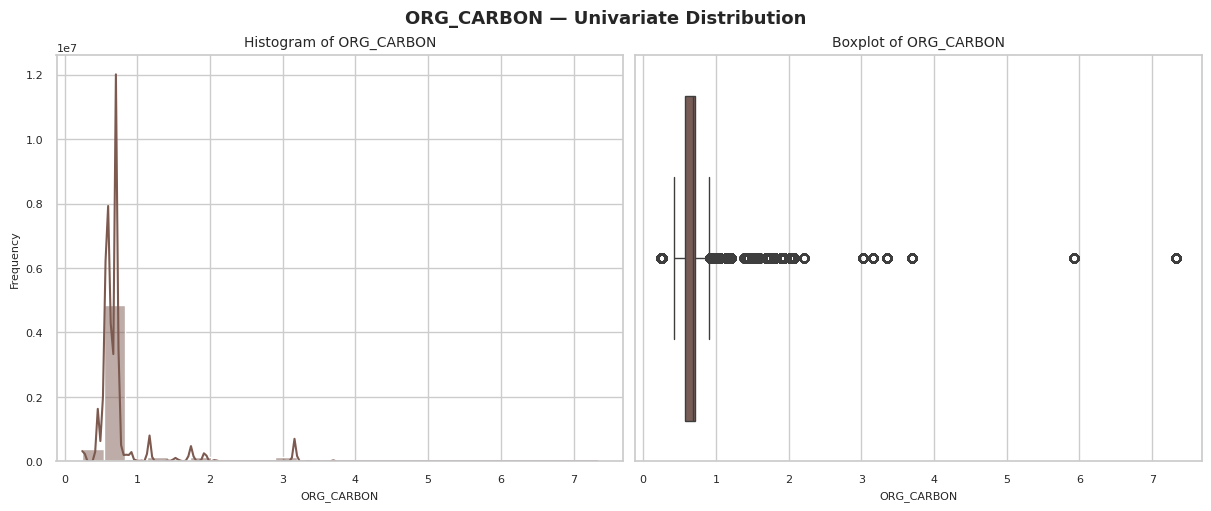


🌱  Univariate analysis for 'PH_WATER'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     7.733412e+00
std      4.767493e-01
min      4.300000e+00
25%      7.400000e+00
50%      7.800000e+00
75%      8.200000e+00
max      8.600000e+00
Name: PH_WATER, dtype: float64

🚨 Outliers: 81495 (1.41%)
   - Low outliers:  81495
   - High outliers: 0


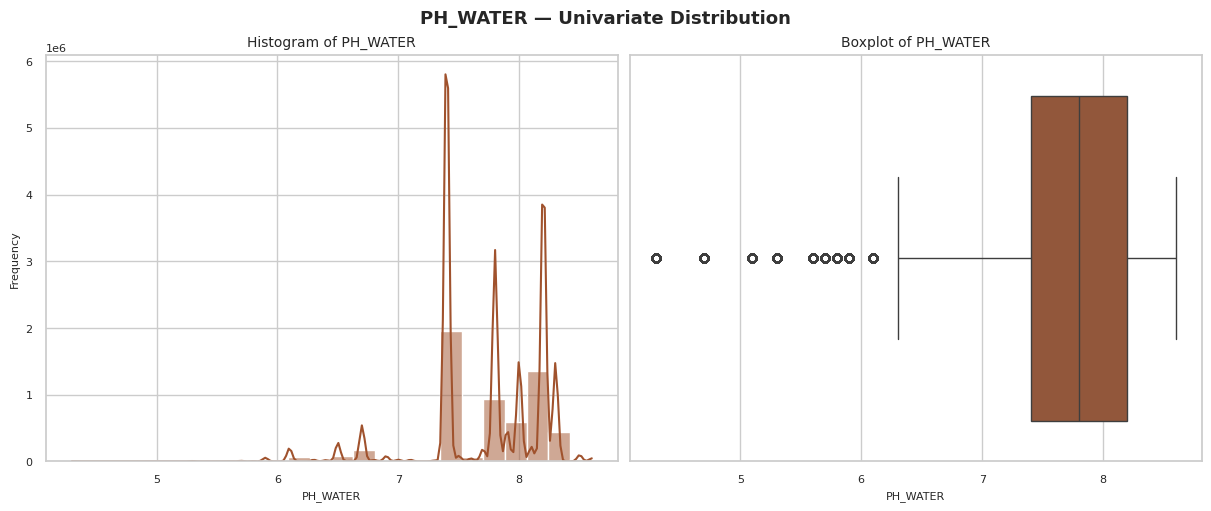


🌱  Univariate analysis for 'TOTAL_N'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     7.420285e-01
std      2.605979e-01
min      2.200000e-01
25%      5.800000e-01
50%      7.300000e-01
75%      8.000000e-01
max      3.690000e+00
Name: TOTAL_N, dtype: float64

🚨 Outliers: 365017 (6.32%)
   - Low outliers:  5820
   - High outliers: 359197


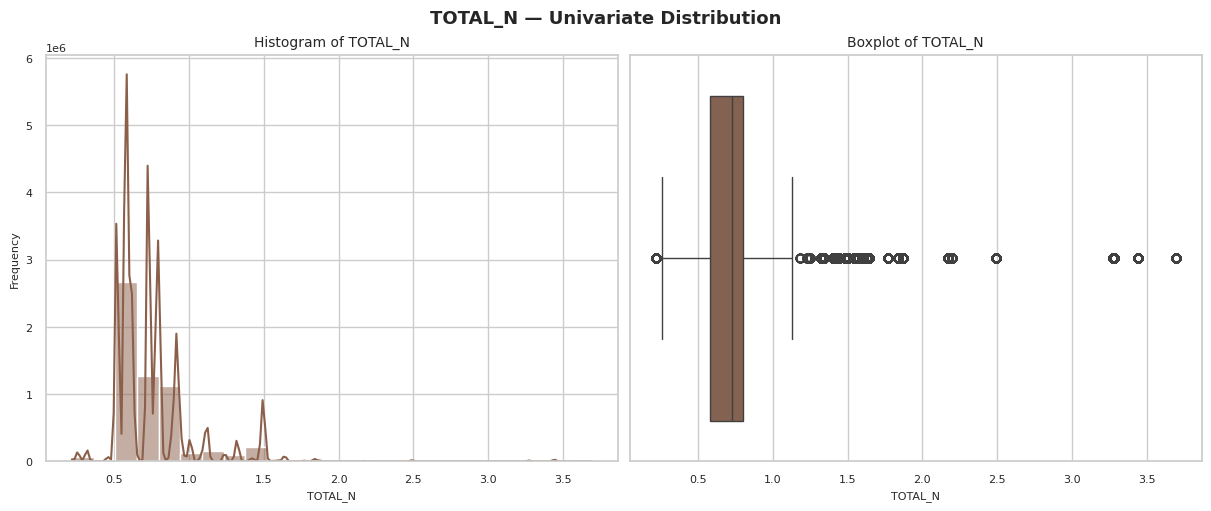


🌱  Univariate analysis for 'CN_RATIO'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.032975e+01
std      1.604932e+00
min      8.000000e+00
25%      9.000000e+00
50%      1.000000e+01
75%      1.200000e+01
max      2.400000e+01
Name: CN_RATIO, dtype: float64

🚨 Outliers: 689 (0.01%)
   - Low outliers:  0
   - High outliers: 689


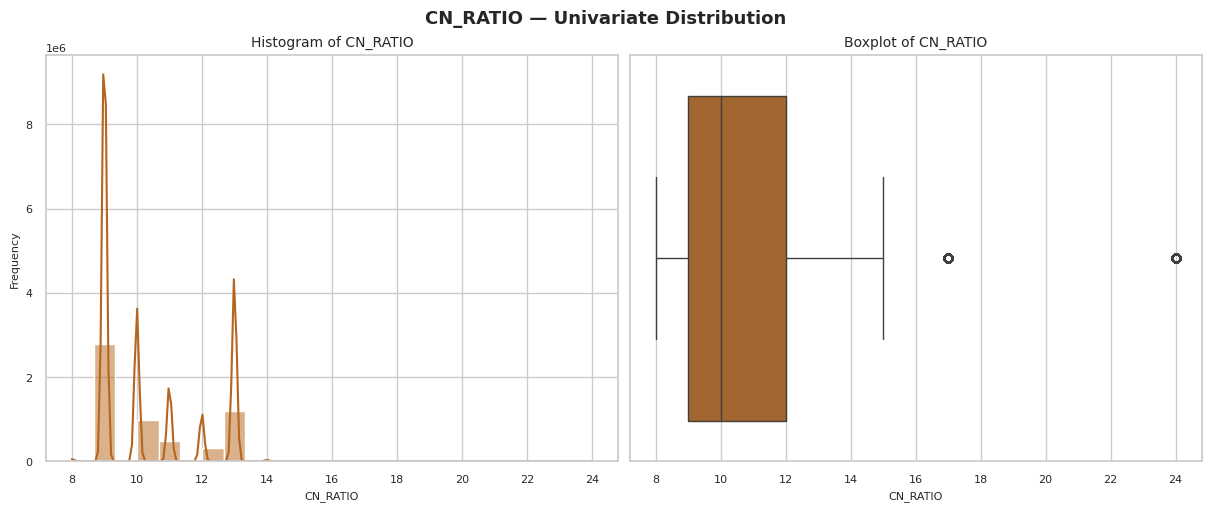


🌱  Univariate analysis for 'CEC_SOIL'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     1.236968e+01
std      4.452574e+00
min      4.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.400000e+01
max      4.100000e+01
Name: CEC_SOIL, dtype: float64

🚨 Outliers: 100494 (1.74%)
   - Low outliers:  0
   - High outliers: 100494


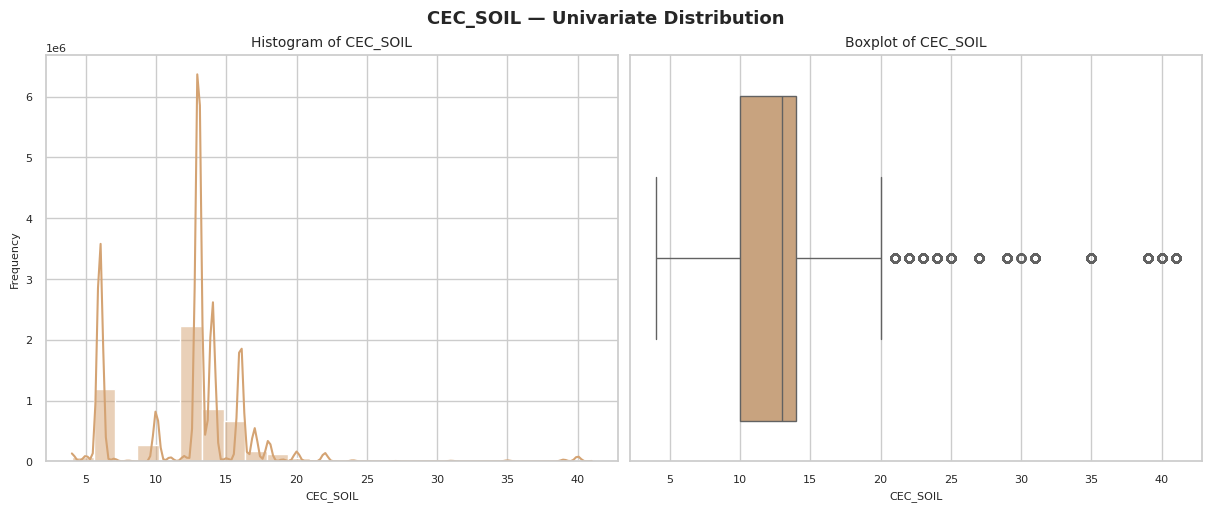


🌱  Univariate analysis for 'CEC_CLAY'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     5.877501e+01
std      1.659060e+01
min      1.600000e+01
25%      4.600000e+01
50%      6.700000e+01
75%      7.400000e+01
max      8.300000e+01
Name: CEC_CLAY, dtype: float64

🚨 Outliers: 0 (0.00%)


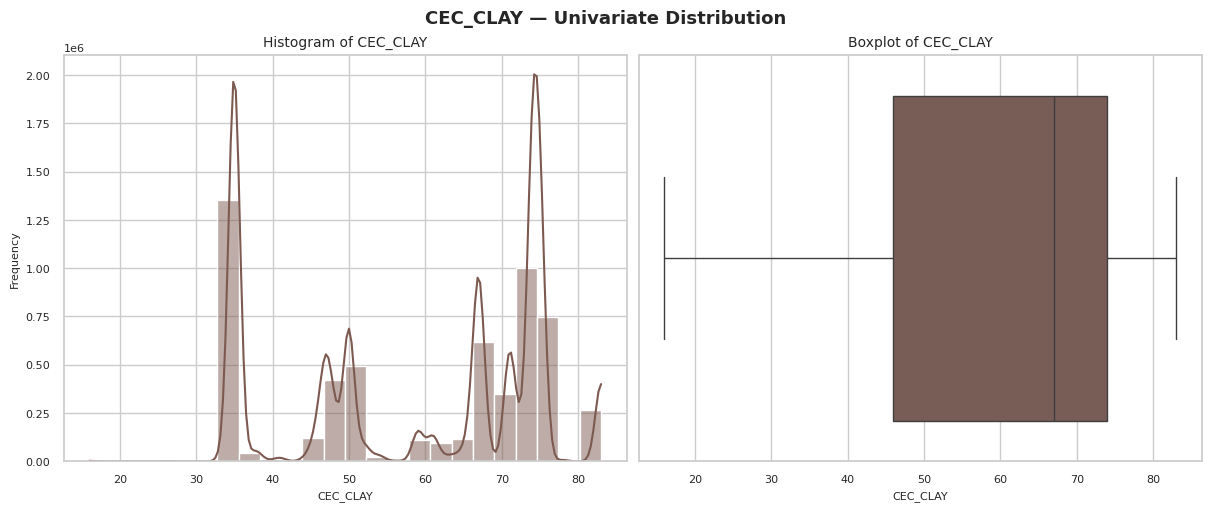


🌱  Univariate analysis for 'CEC_EFF'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     3.563989e+01
std      2.115271e+01
min      3.000000e+00
25%      2.500000e+01
50%      3.000000e+01
75%      3.800000e+01
max      1.430000e+02
Name: CEC_EFF, dtype: float64

🚨 Outliers: 816492 (14.14%)
   - Low outliers:  42631
   - High outliers: 773861


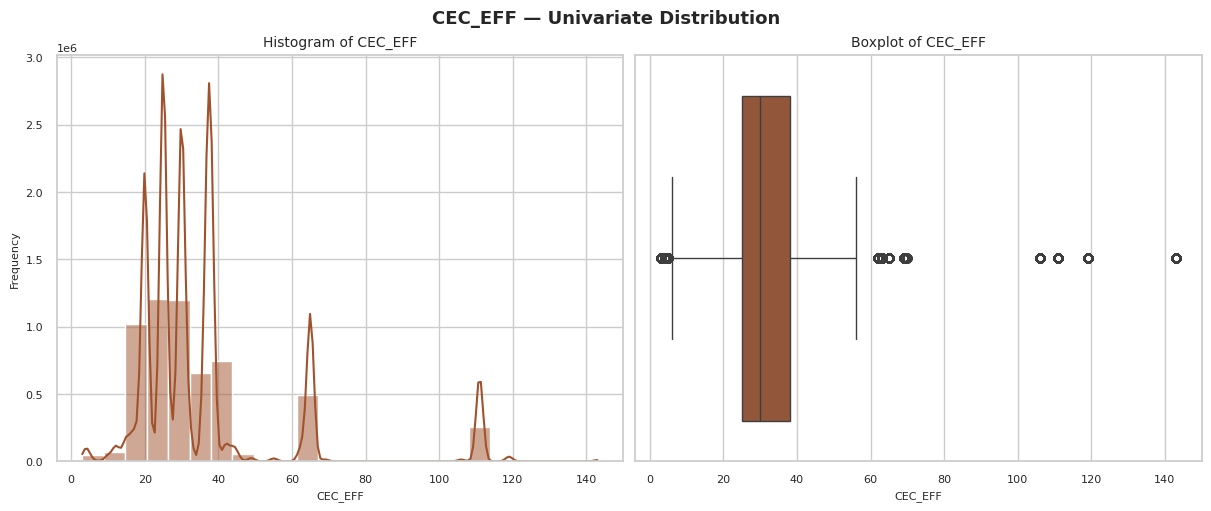


🌱  Univariate analysis for 'TEB'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     3.230017e+01
std      2.347781e+01
min      2.000000e+00
25%      1.600000e+01
50%      3.000000e+01
75%      3.800000e+01
max      1.430000e+02
Name: TEB, dtype: float64

🚨 Outliers: 278086 (4.82%)
   - Low outliers:  0
   - High outliers: 278086


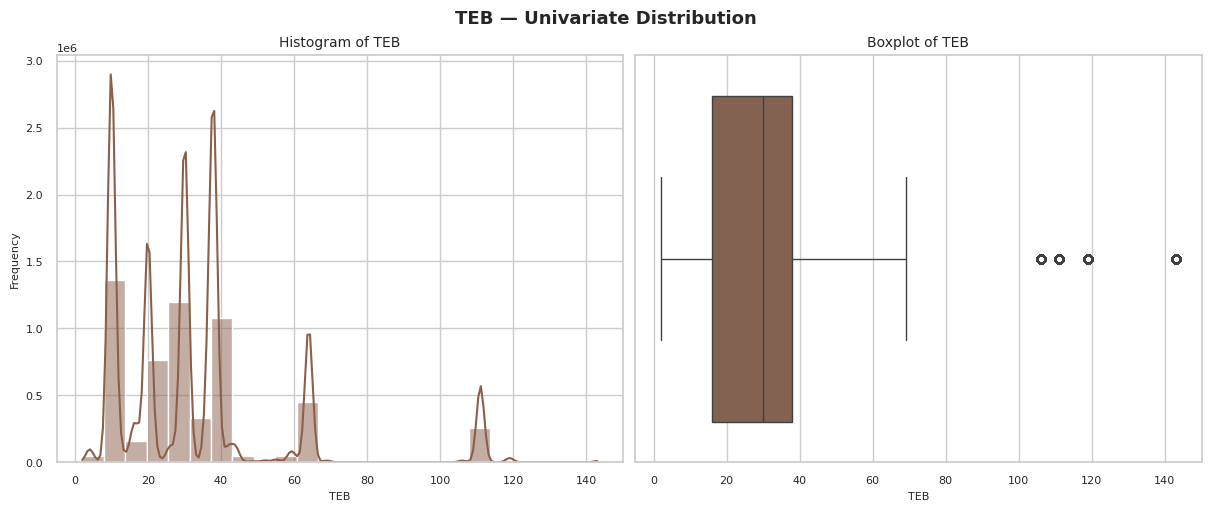


🌱  Univariate analysis for 'BSAT'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     9.040220e+01
std      1.479162e+01
min      1.000000e+01
25%      8.200000e+01
50%      9.900000e+01
75%      1.000000e+02
max      1.000000e+02
Name: BSAT, dtype: float64

🚨 Outliers: 3114 (0.05%)
   - Low outliers:  3114
   - High outliers: 0


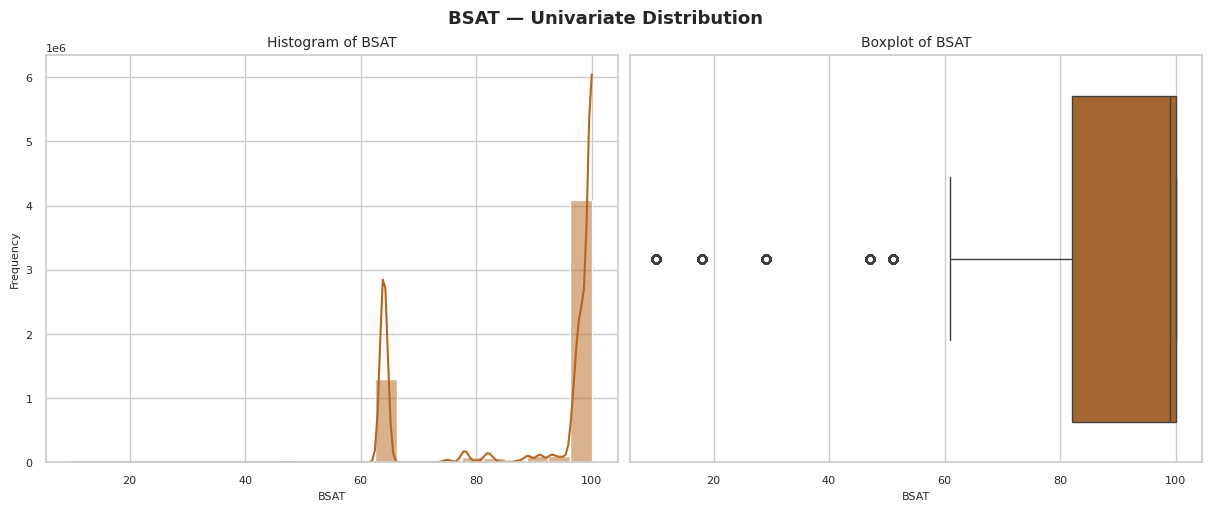


🌱  Univariate analysis for 'ALUM_SAT'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     5.267731e-02
std      9.236616e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+01
Name: ALUM_SAT, dtype: float64

🚨 Outliers: 22433 (0.39%)
   - Low outliers:  0
   - High outliers: 22433


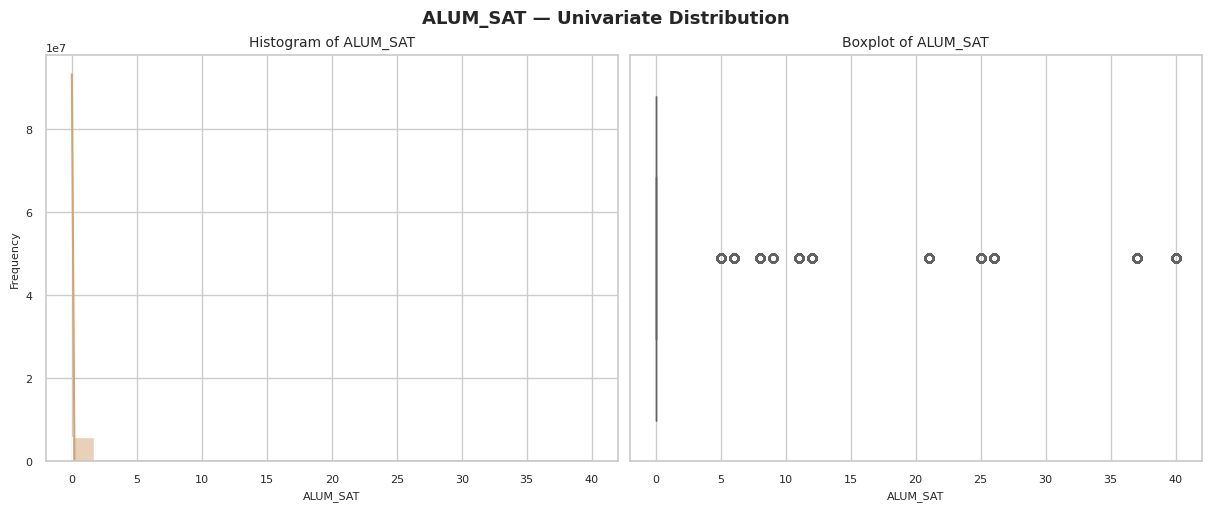


🌱  Univariate analysis for 'ESP'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     7.242914e+00
std      1.311873e+01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      6.700000e+01
Name: ESP, dtype: float64

🚨 Outliers: 1149429 (19.91%)
   - Low outliers:  282632
   - High outliers: 866797


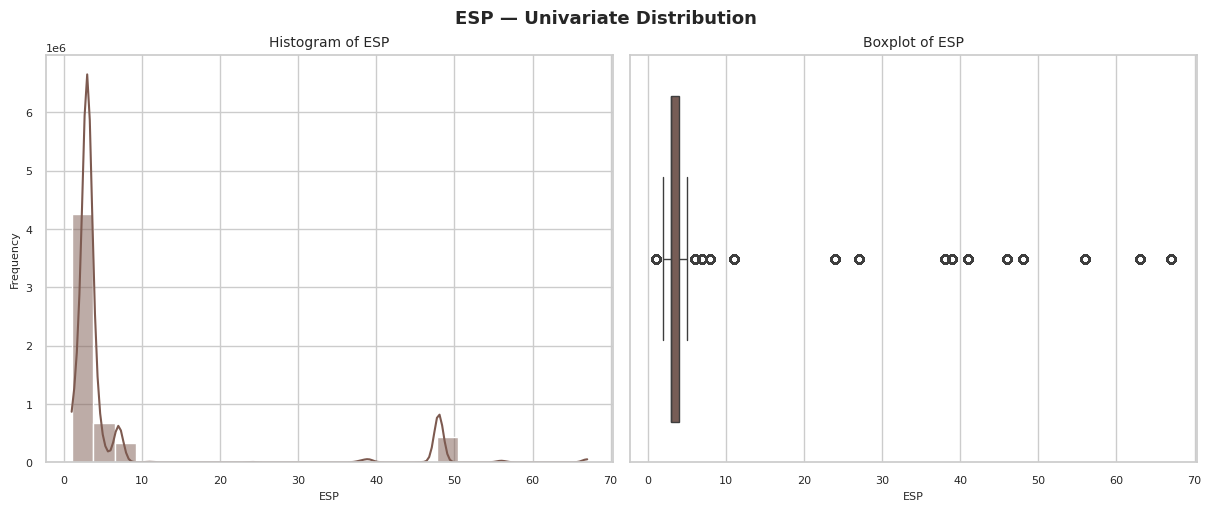


🌱  Univariate analysis for 'TCARBON_EQ'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     8.378682e+00
std      4.844318e+00
min      0.000000e+00
25%      6.300000e+00
50%      8.000000e+00
75%      1.290000e+01
max      3.130000e+01
Name: TCARBON_EQ, dtype: float64

🚨 Outliers: 29936 (0.52%)
   - Low outliers:  0
   - High outliers: 29936


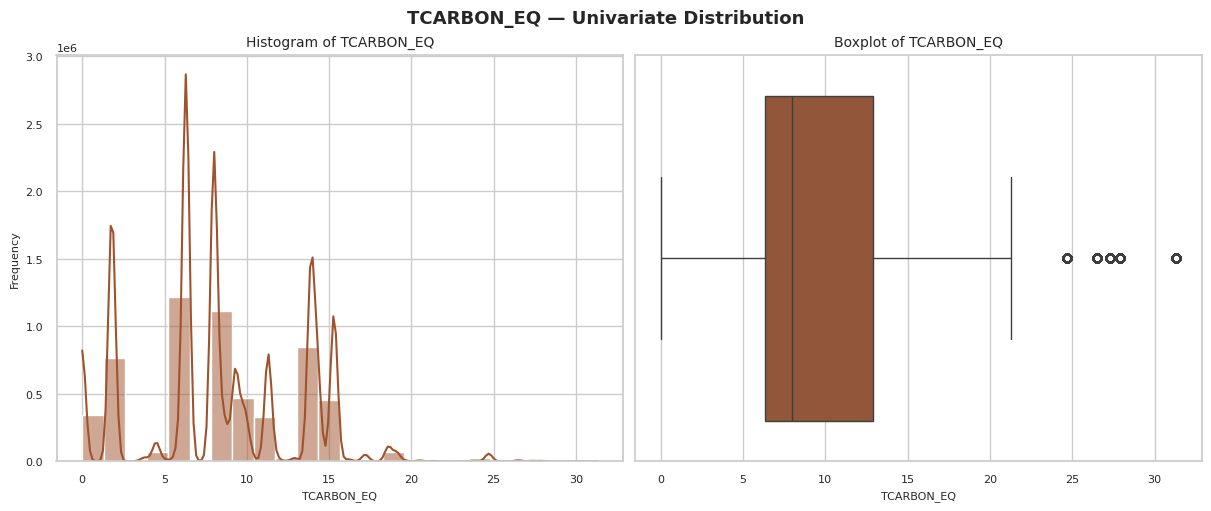


🌱  Univariate analysis for 'GYPSUM'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     4.141357e+00
std      8.458954e+00
min      0.000000e+00
25%      3.000000e-01
50%      2.100000e+00
75%      4.000000e+00
max      5.760000e+01
Name: GYPSUM, dtype: float64

🚨 Outliers: 323340 (5.60%)
   - Low outliers:  0
   - High outliers: 323340


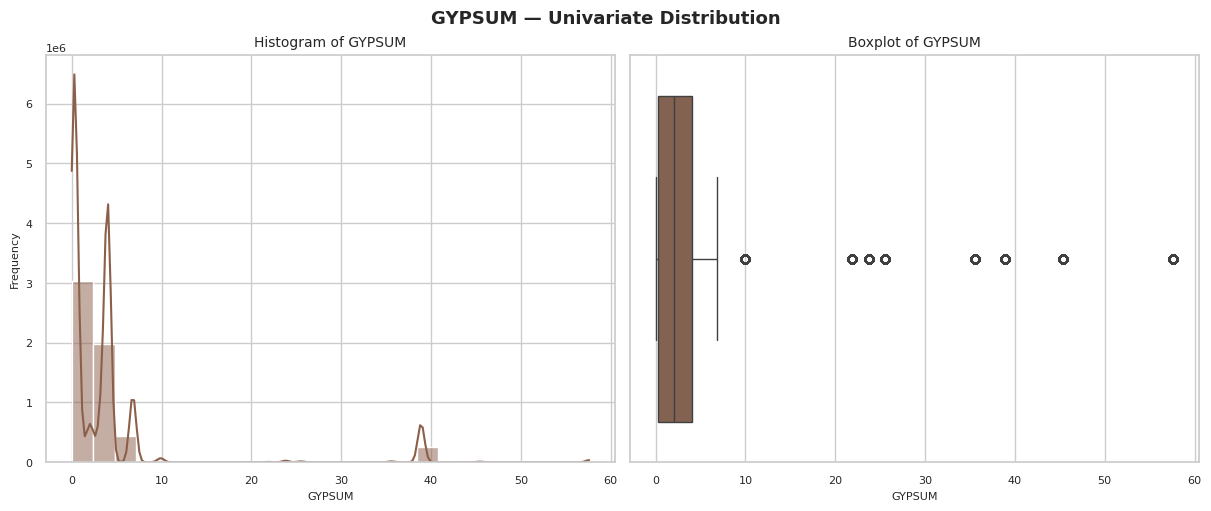


🌱  Univariate analysis for 'ELEC_COND'
------------------------------------------------------------
📊 Summary statistics:
count    5.774004e+06
mean     2.284177e+00
std      3.800665e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.200000e+01
Name: ELEC_COND, dtype: float64

🚨 Outliers: 1373217 (23.78%)
   - Low outliers:  133614
   - High outliers: 1239603


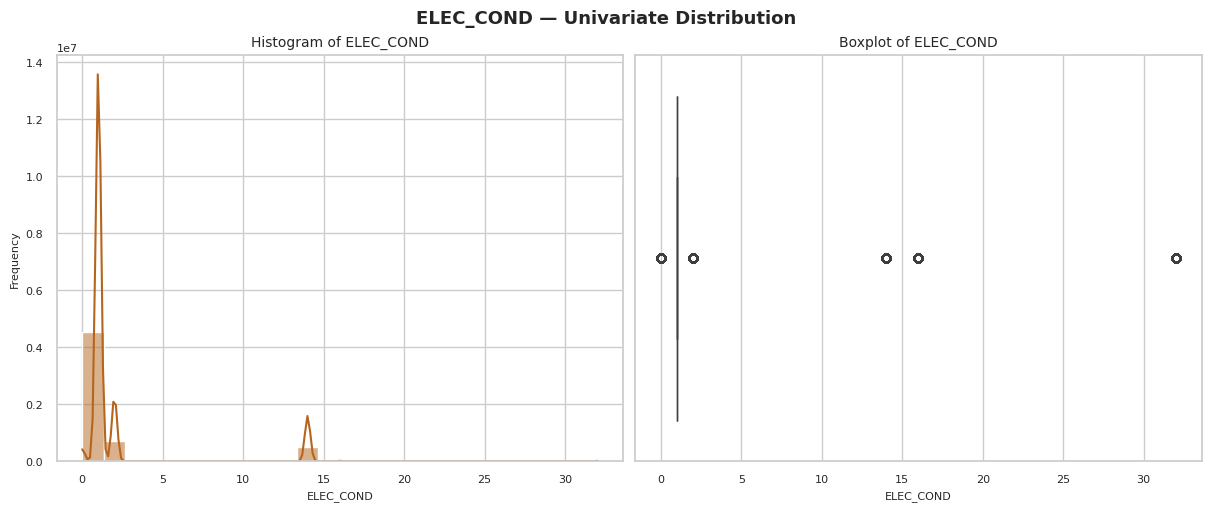

In [22]:

earth_colors = ["#a67b5b", "#c2b280", "#8e653f", "#deb887", "#b5651d", "#744a1d"]

# Categorical columns
for i, col in enumerate(categorical_cols):
    plot_univariate_distribution(col, "categorical", color_key=list(EARTH_COLORS.keys())[i % len(EARTH_COLORS)])

# Numerical columns
for i, col in enumerate(numerical_cols):
    plot_univariate_distribution(col, "numerical", color_key=list(EARTH_COLORS.keys())[i % len(EARTH_COLORS)])



In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import os

def plot_all_soil_maps(soil_df, numerical_cols, categorical_cols, lon_col="LONGITUDE", lat_col="LATITUDE",
                       n_cols=2, cmap="terrain", save_dir=None):
    """
    Plots spatial maps of soil properties using lat/lon coordinates.
    - Numerical columns use a colorbar.
    - Categorical columns use discrete colors (legend).
    """

    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(
        soil_df,
        geometry=gpd.points_from_xy(soil_df[lon_col], soil_df[lat_col]),
        crs="EPSG:4326"
    )

    total_cols = numerical_cols + categorical_cols
    n_rows = (len(total_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 6 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(total_cols):
        ax = axes[i]
        ax.set_title(col, fontsize=12)

        if col in numerical_cols:
            # Plot numerical with colorbar
            sc = ax.scatter(
                gdf[lon_col], gdf[lat_col],
                c=gdf[col],
                cmap=cmap,
                s=10,
                alpha=0.7
            )
            plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.8)
        else:
            # Plot categorical with discrete palette
            unique_vals = gdf[col].dropna().unique()
            palette = sns.color_palette("Set2", len(unique_vals))
            for val, color in zip(unique_vals, palette):
                subset = gdf[gdf[col] == val]
                ax.scatter(subset[lon_col], subset[lat_col],
                           color=color, label=str(val), s=10, alpha=0.7)
            ax.legend(title=col, loc="best", fontsize=8)

        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(os.path.join(save_dir, f"map_{col}.png"), dpi=300, bbox_inches="tight")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [23]:
# categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
# numerical_cols = [
#     'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
#     'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
#     'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
# ]

# plot_all_soil_maps(
#     soil_df,
#     numerical_cols,
#     categorical_cols,
#     lon_col="longitude",
#     lat_col="latitude",
#     n_cols=2,
#     cmap="terrain",   # or try "earth" / "YlOrBr"
#     save_dir="Images_dir"
# )


## Bivariate Analysis

In [6]:
def bivariate_analysis(df, col1, col2, type1, type2, max_points=5000):
    """
    Perform bivariate analysis depending on variable types.
    type1 and type2 ∈ {"numerical", "categorical"}.
    
    - numerical–numerical → scatter plot + Q–Q plot + correlations
    - numerical–categorical → boxplot + t-test if applicable
    - categorical–categorical → Chi-square test
    """

    data = df[[col1, col2]].dropna()
    # if len(data) > max_points:
    #     data = data.sample(max_points, random_state=42)

    print(f"\n🌿 Bivariate analysis: {col1} ({type1}) vs {col2} ({type2})")
    print("------------------------------------------------------------")

    # === 1️⃣ NUM–NUM ===
    if type1 == "numerical" and type2 == "numerical":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Scatter plot
        sns.scatterplot(data=data, x=col1, y=col2, alpha=0.6, ax=axes[0])
        axes[0].set_title(f"Scatter Plot: {col1} vs {col2}")

        # Q–Q plot (normality check for col1)
        stats.probplot(data[col1].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q–Q Plot of {col1}")

        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_{col1}_{col2}_scatter_qq_plots.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # Correlation
        pearson_corr, _ = stats.pearsonr(data[col1], data[col2])
        spearman_corr, _ = stats.spearmanr(data[col1], data[col2])
        print(f"📈 Pearson correlation: {pearson_corr:.3f}")
        print(f"📊 Spearman correlation: {spearman_corr:.3f}")

    # === 2️⃣ NUM–CAT ===
    elif (type1 == "numerical" and type2 == "categorical") or (type1 == "categorical" and type2 == "numerical"):
        num_col = col1 if type1 == "numerical" else col2
        cat_col = col2 if type2 == "categorical" else col1

        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=data, x=cat_col, y=num_col, ax=ax)
        ax.set_title(f"Boxplot: {num_col} by {cat_col}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.savefig(os.path.join(Images_dir, f"soil_{num_col}_by_{cat_col}_boxplot.png"), dpi=300, bbox_inches='tight')
        plt.show()

        # T-test (only for 2 categories)
        unique_vals = data[cat_col].unique()
        if len(unique_vals) == 2:
            group1 = data[data[cat_col] == unique_vals[0]][num_col]
            group2 = data[data[cat_col] == unique_vals[1]][num_col]
            t_stat, p_value = stats.ttest_ind(group1, group2)
            print(f"🧪 T-test ({unique_vals[0]} vs {unique_vals[1]}): t = {t_stat:.3f}, p = {p_value:.4f}")
        else:
            print("⚠️ More than 2 categories — skipping t-test.")

    # === 3️⃣ CAT–CAT ===
    elif type1 == "categorical" and type2 == "categorical":
        contingency = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        print(f"🧩 Chi-square test: χ² = {chi2:.3f}, p = {p:.4f}, dof = {dof}")
        print("Contingency table:\n", contingency)

    print("------------------------------------------------------------")


In [7]:
from itertools import combinations

categorical_cols = ['TEXTURE_USDA', 'TEXTURE_SOTER']
numerical_cols = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON',
    'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
    'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'
]

In [24]:

# # For categorical vs categorical
# for col1, col2 in combinations(categorical_cols, 2):
#     bivariate_analysis(soil_df, col1, col2, type1="categorical", type2="categorical")

# # For numerical vs numerical
# for col1, col2 in combinations(numerical_cols, 2):
#     bivariate_analysis(soil_df, col1, col2, type1="numerical", type2="numerical")

# # For categorical vs numerical
# for cat_col in categorical_cols:
#     for num_col in numerical_cols:
#         bivariate_analysis(soil_df, cat_col, num_col, type1="categorical", type2="numerical")



🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs COARSE (numerical)
------------------------------------------------------------


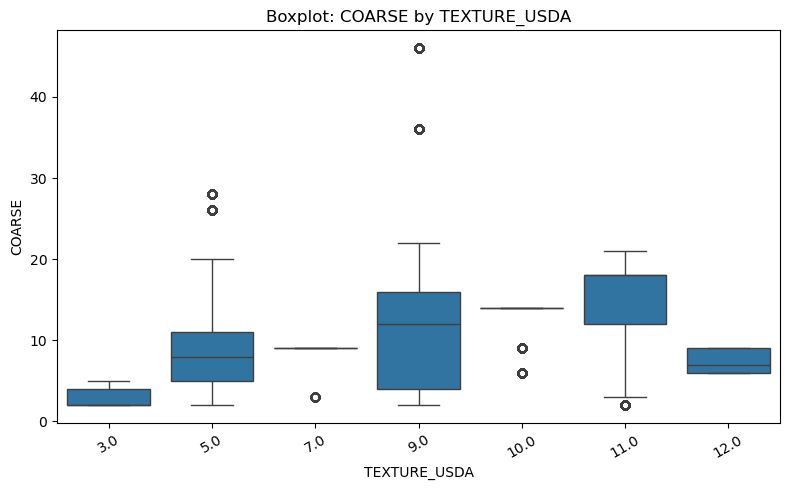

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs SAND (numerical)
------------------------------------------------------------


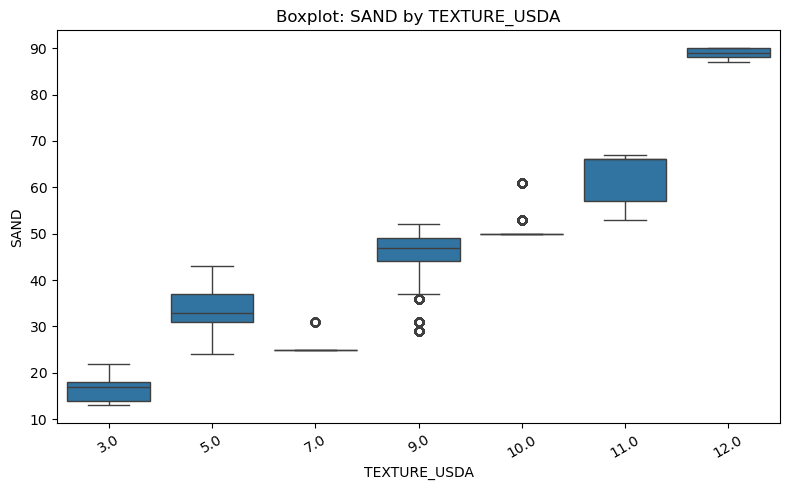

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs SILT (numerical)
------------------------------------------------------------


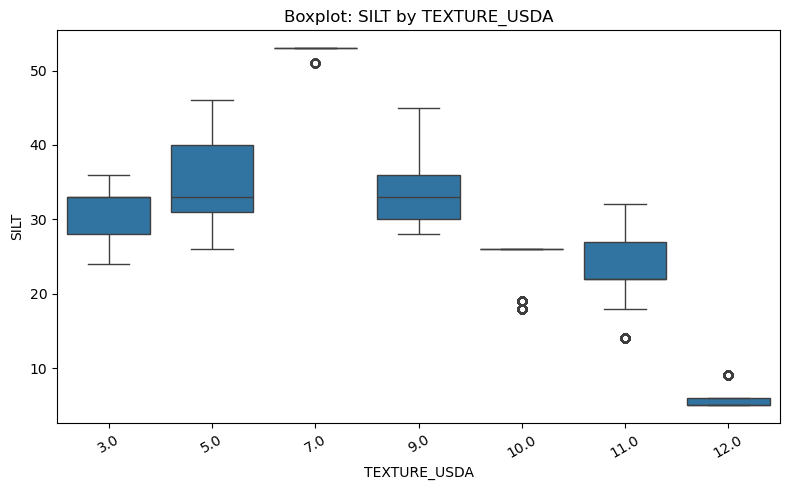

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CLAY (numerical)
------------------------------------------------------------


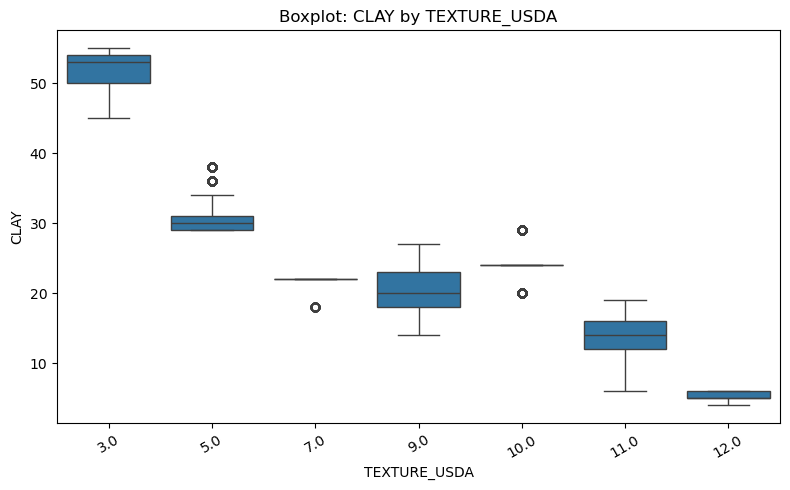

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs BULK (numerical)
------------------------------------------------------------


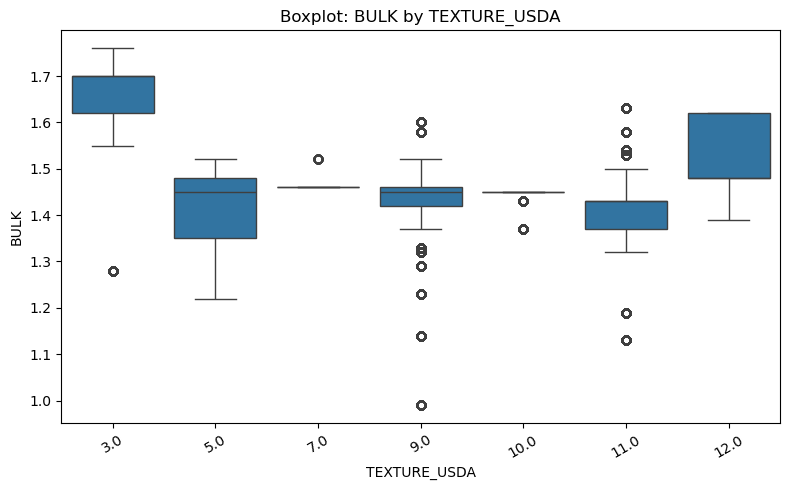

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs REF_BULK (numerical)
------------------------------------------------------------


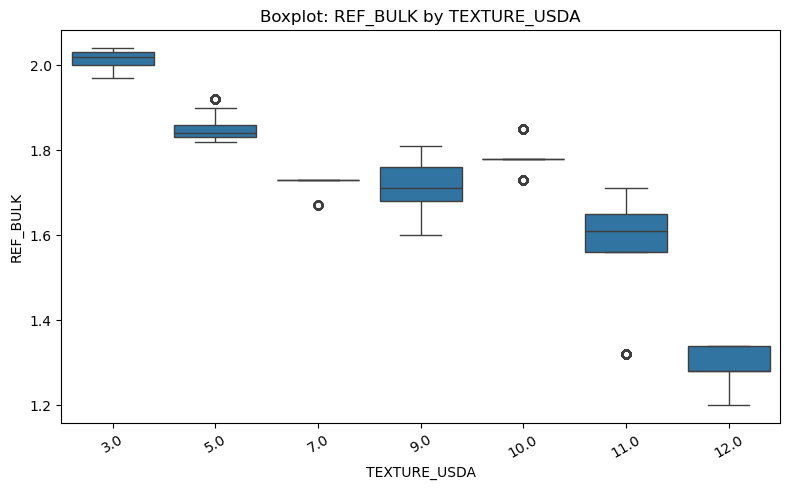

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ORG_CARBON (numerical)
------------------------------------------------------------


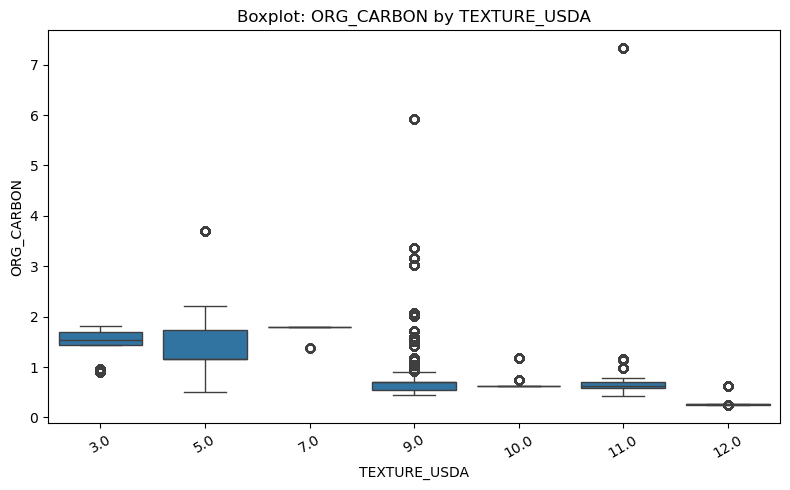

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs PH_WATER (numerical)
------------------------------------------------------------


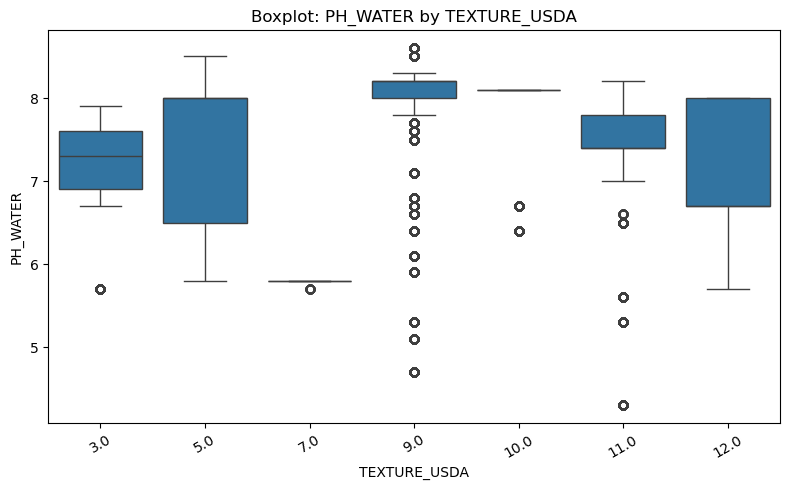

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TOTAL_N (numerical)
------------------------------------------------------------


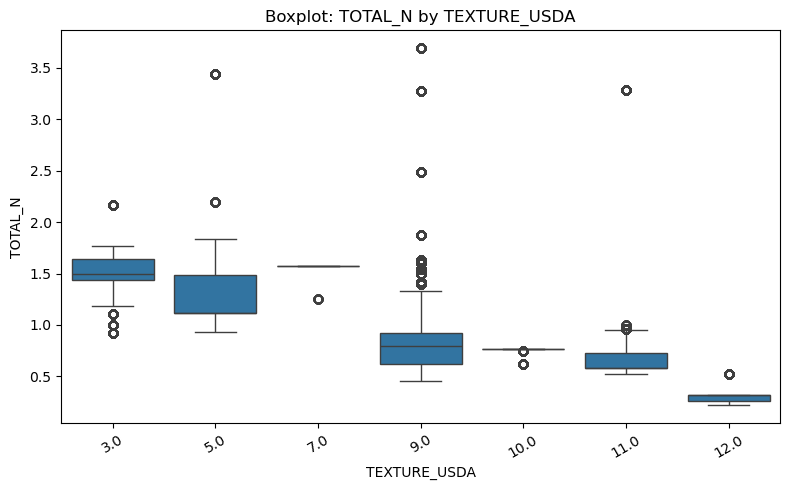

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CN_RATIO (numerical)
------------------------------------------------------------


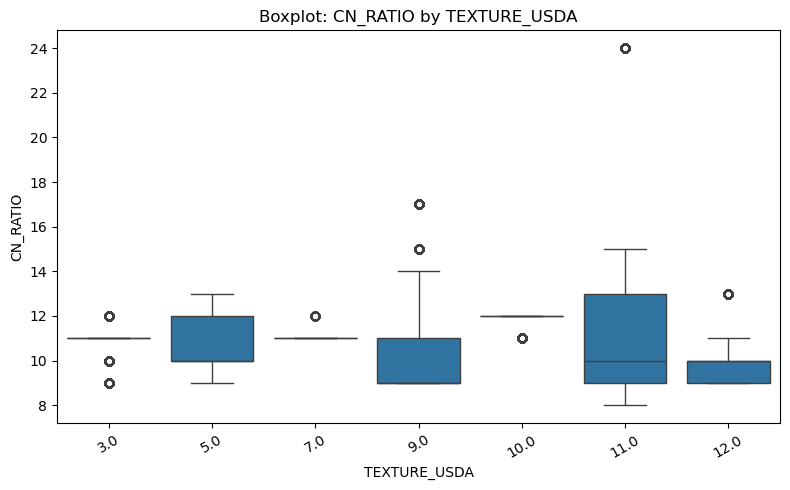

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_SOIL (numerical)
------------------------------------------------------------


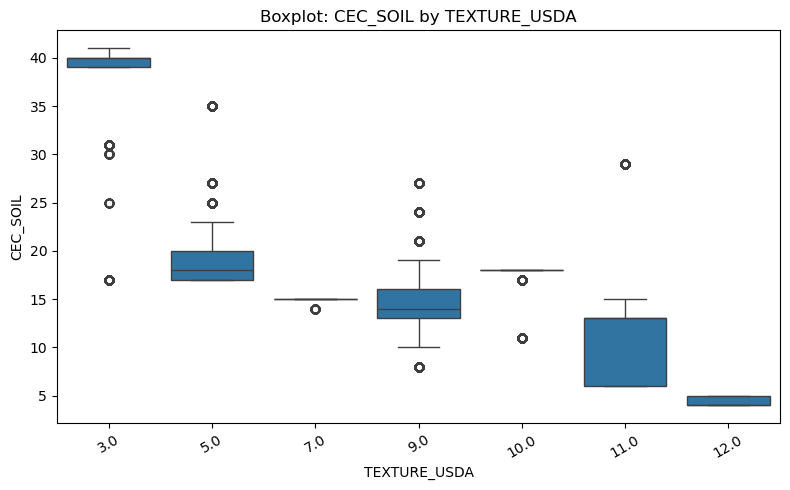

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_CLAY (numerical)
------------------------------------------------------------


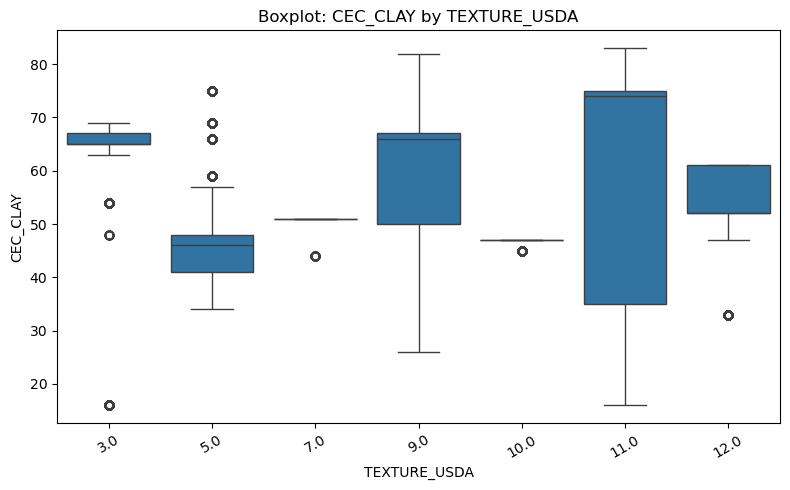

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs CEC_EFF (numerical)
------------------------------------------------------------


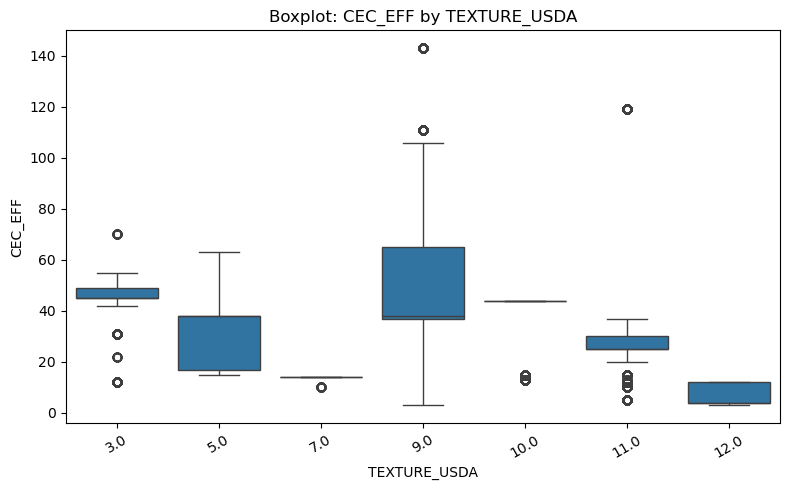

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TEB (numerical)
------------------------------------------------------------


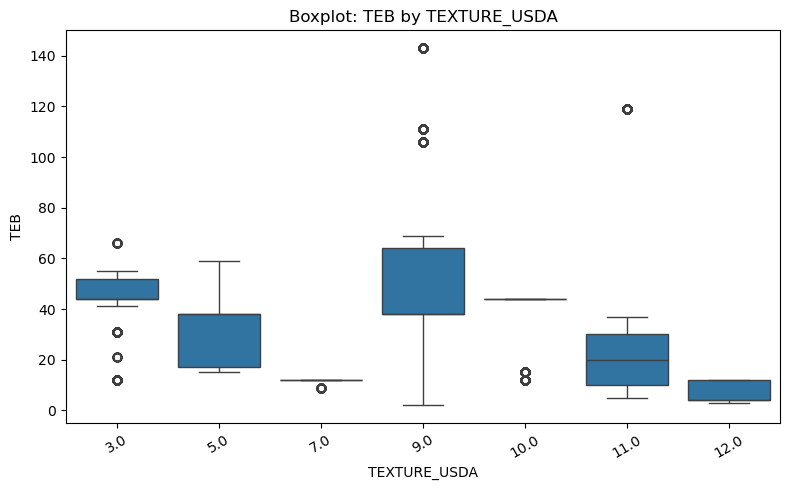

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs BSAT (numerical)
------------------------------------------------------------


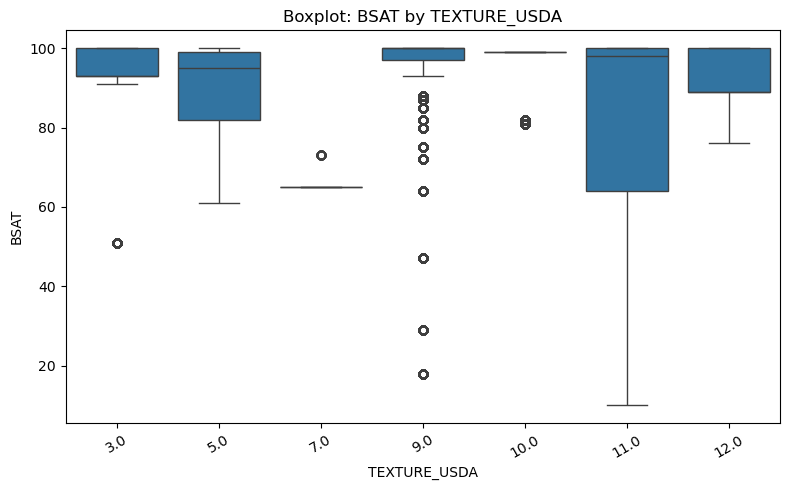

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ALUM_SAT (numerical)
------------------------------------------------------------


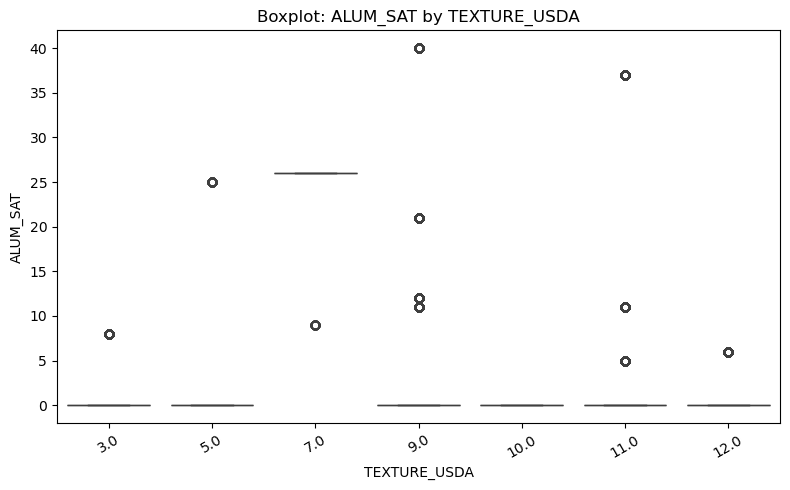

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ESP (numerical)
------------------------------------------------------------


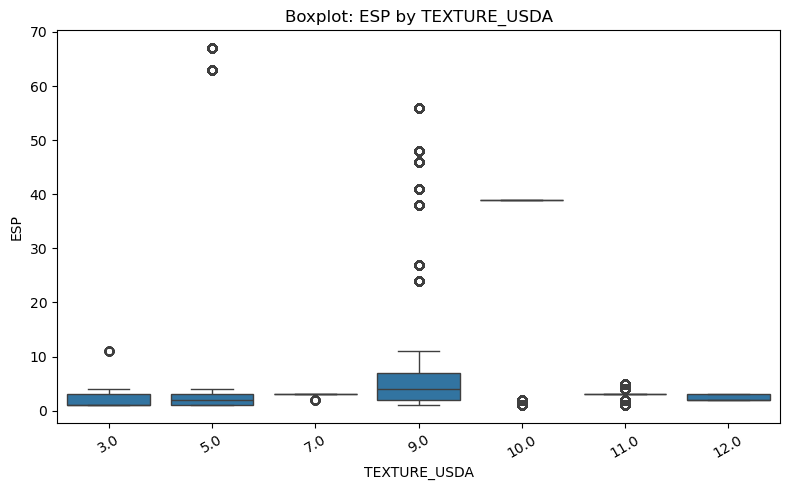

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs TCARBON_EQ (numerical)
------------------------------------------------------------


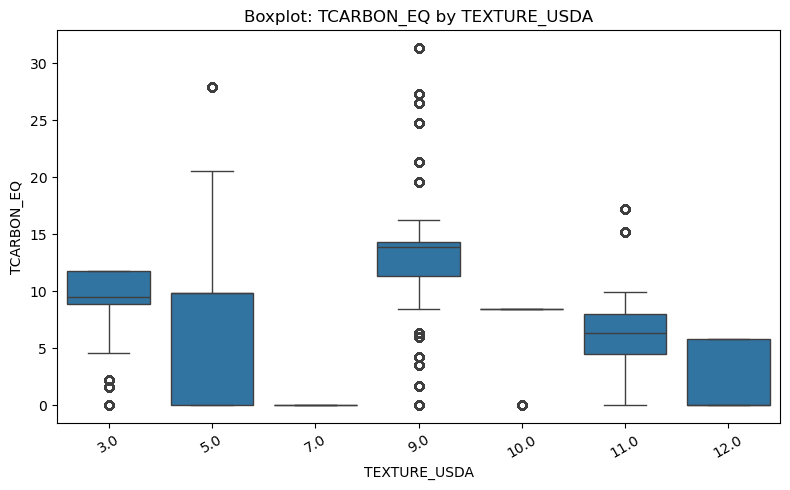

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs GYPSUM (numerical)
------------------------------------------------------------


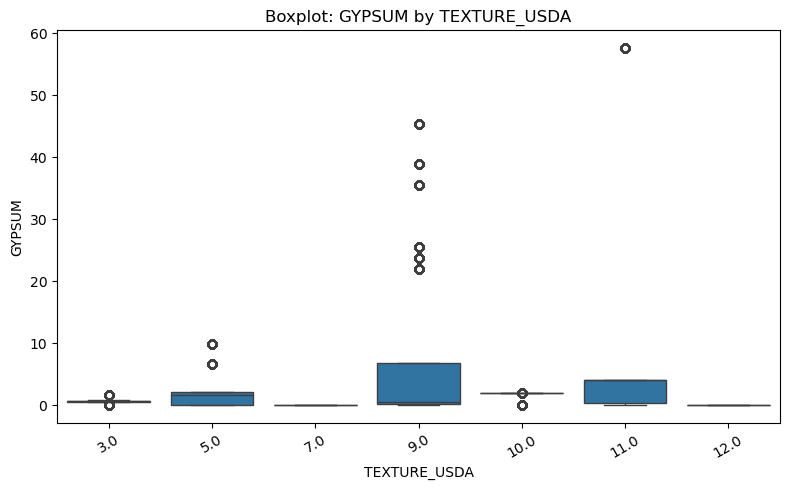

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_USDA (categorical) vs ELEC_COND (numerical)
------------------------------------------------------------


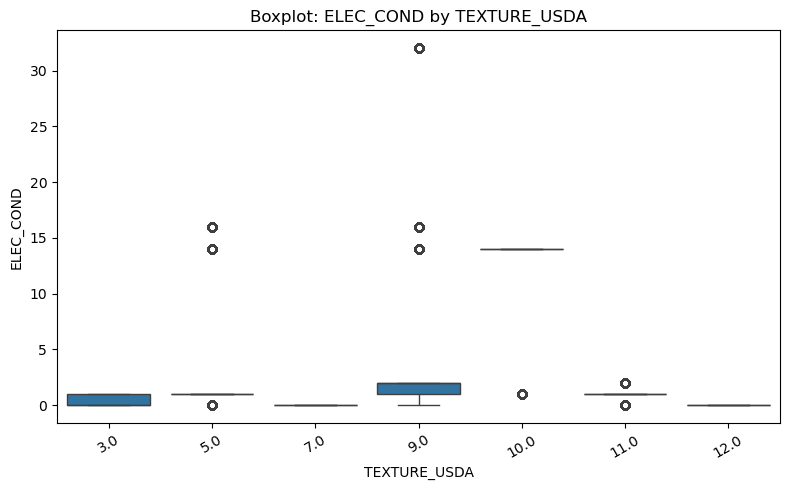

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs COARSE (numerical)
------------------------------------------------------------


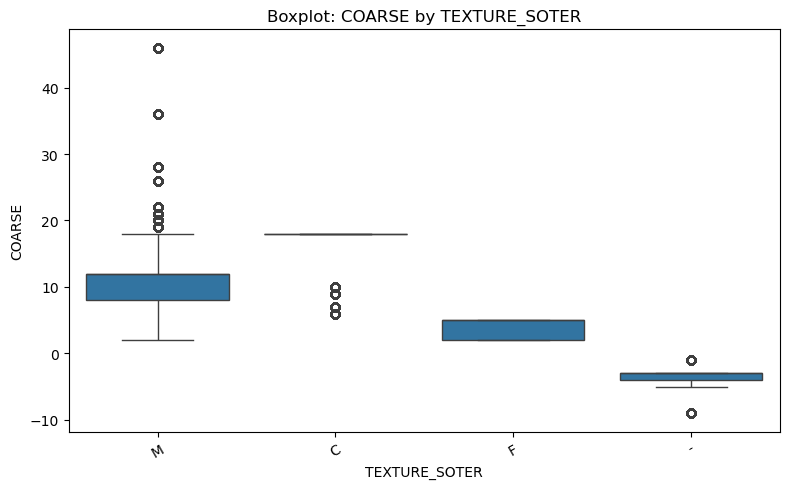

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs SAND (numerical)
------------------------------------------------------------


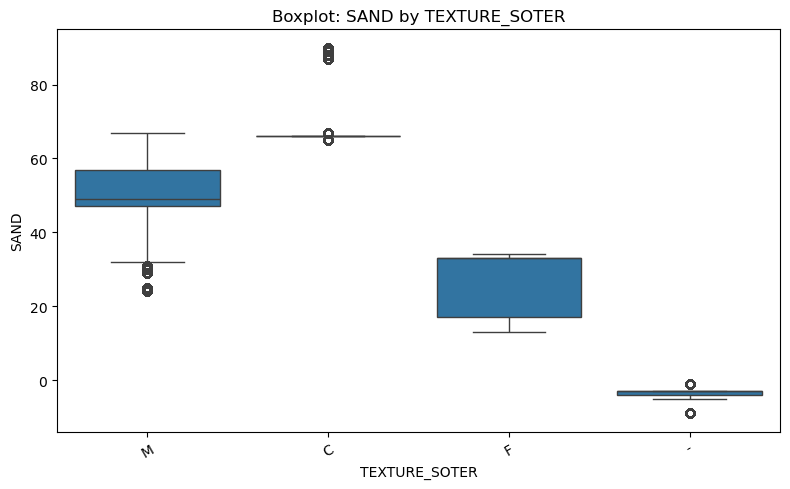

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs SILT (numerical)
------------------------------------------------------------


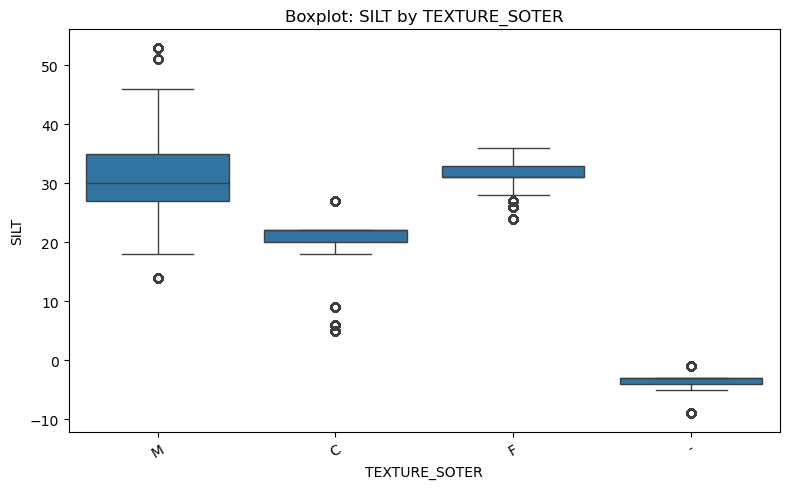

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CLAY (numerical)
------------------------------------------------------------


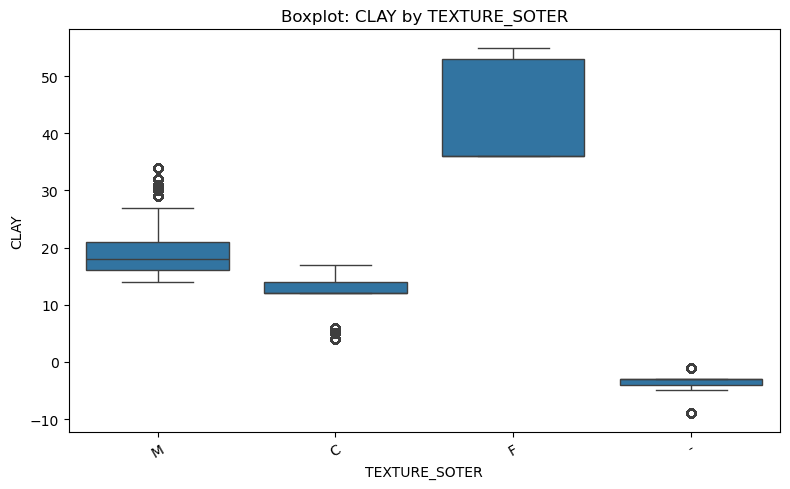

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs BULK (numerical)
------------------------------------------------------------


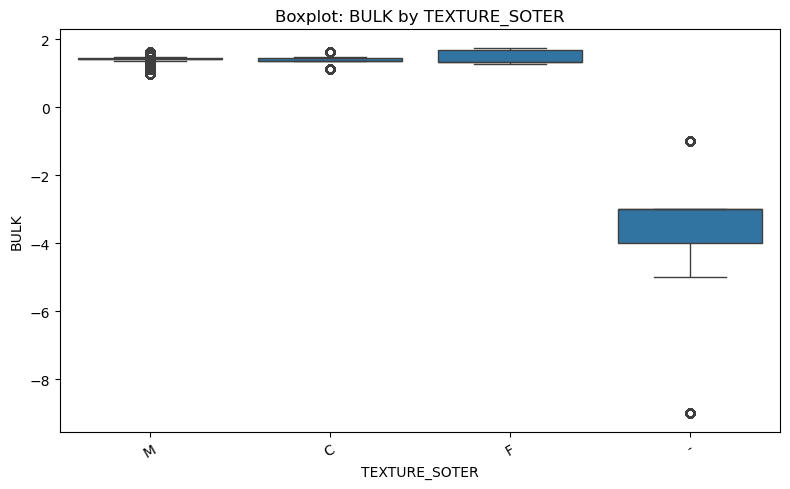

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs REF_BULK (numerical)
------------------------------------------------------------


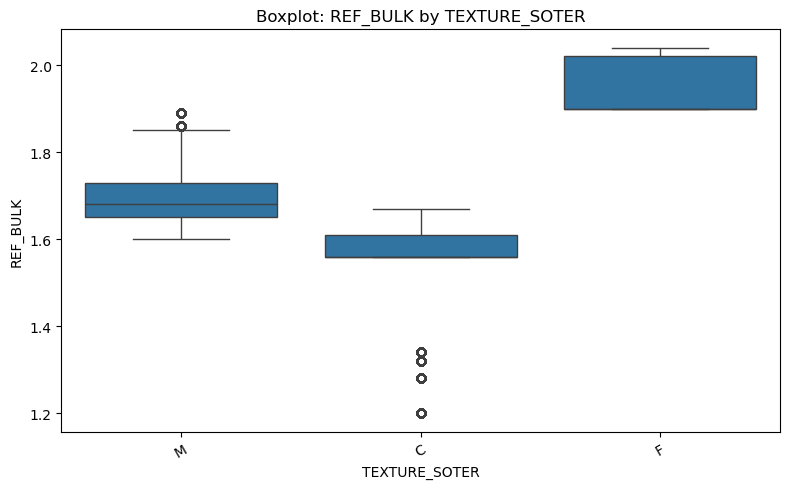

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ORG_CARBON (numerical)
------------------------------------------------------------


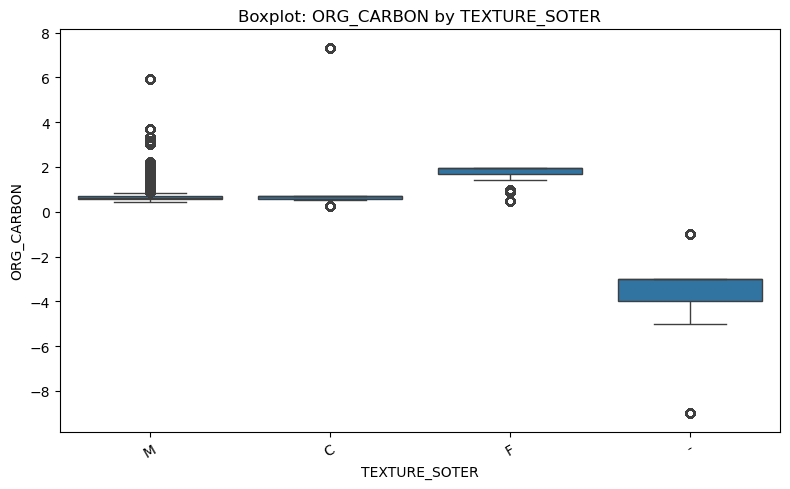

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs PH_WATER (numerical)
------------------------------------------------------------


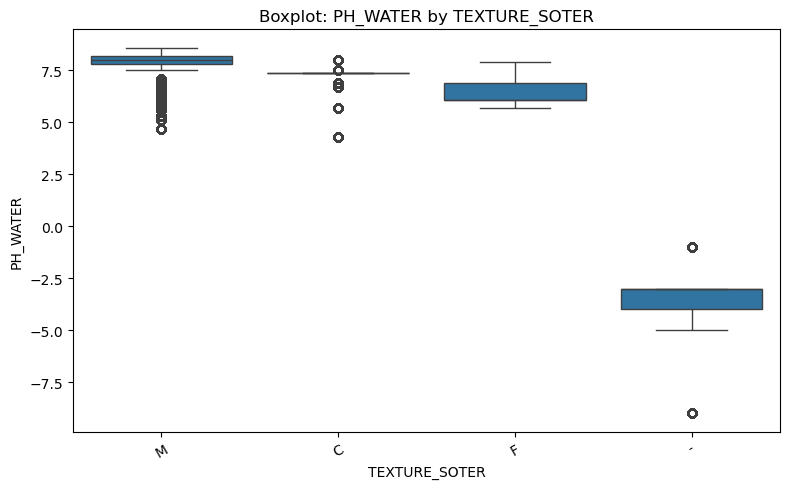

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TOTAL_N (numerical)
------------------------------------------------------------


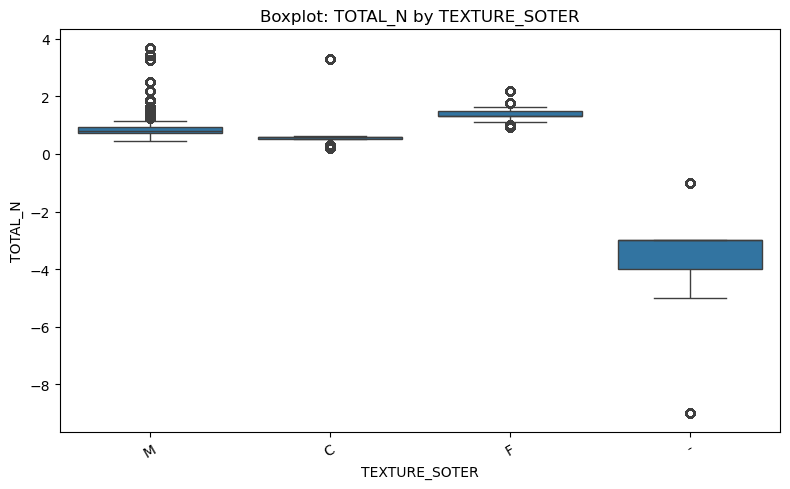

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CN_RATIO (numerical)
------------------------------------------------------------


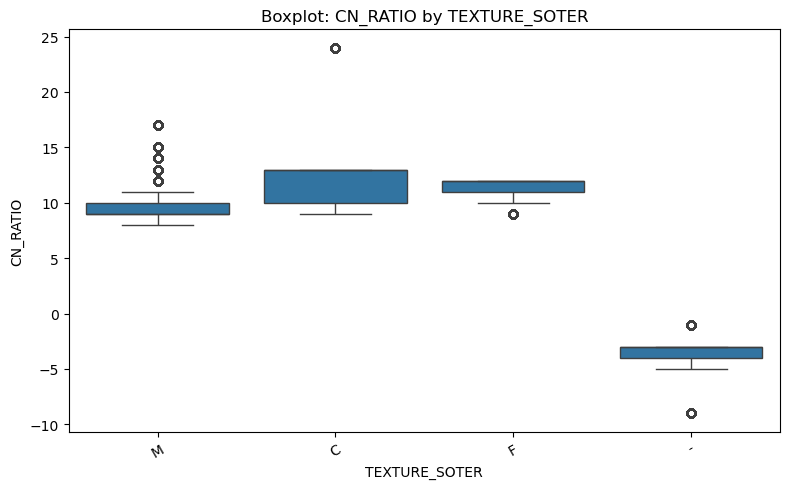

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_SOIL (numerical)
------------------------------------------------------------


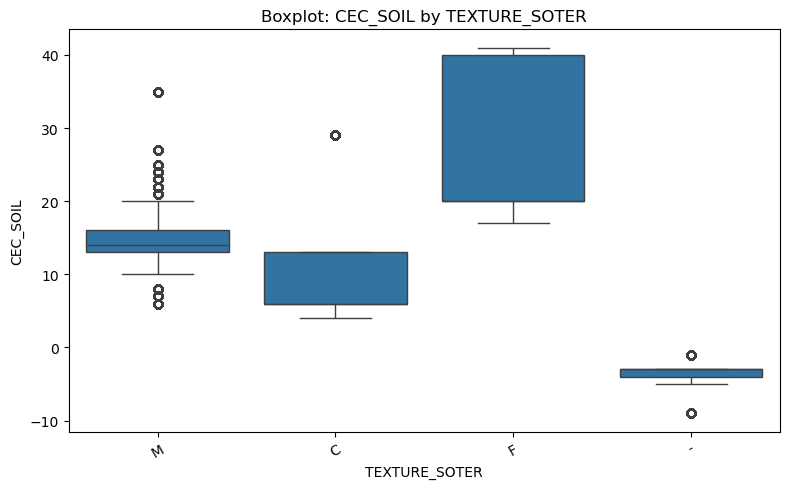

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_CLAY (numerical)
------------------------------------------------------------


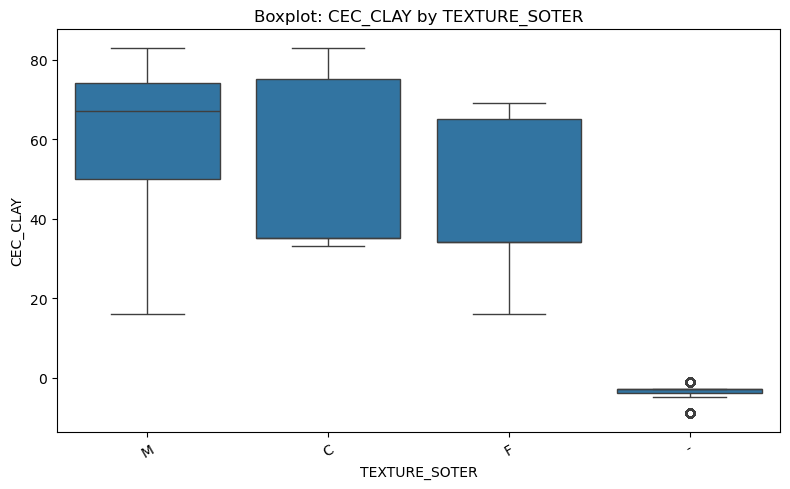

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs CEC_EFF (numerical)
------------------------------------------------------------


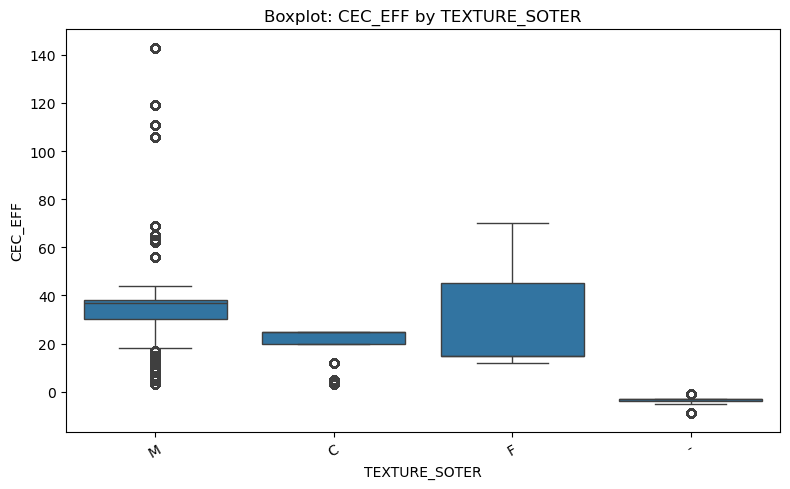

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TEB (numerical)
------------------------------------------------------------


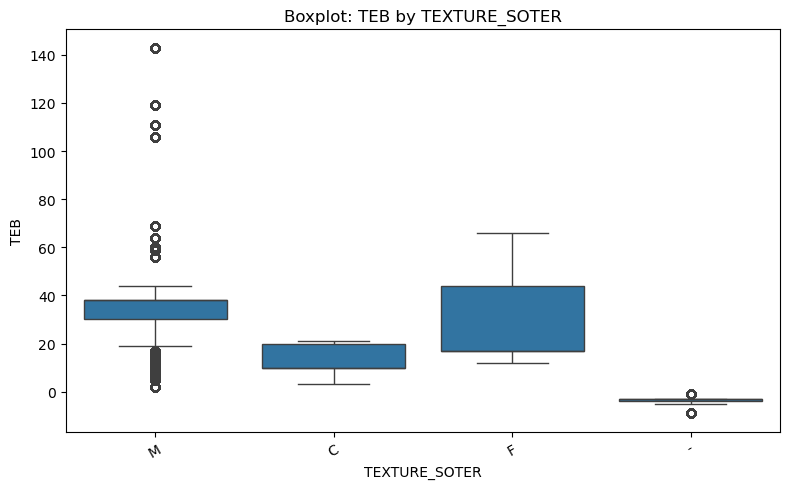

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs BSAT (numerical)
------------------------------------------------------------


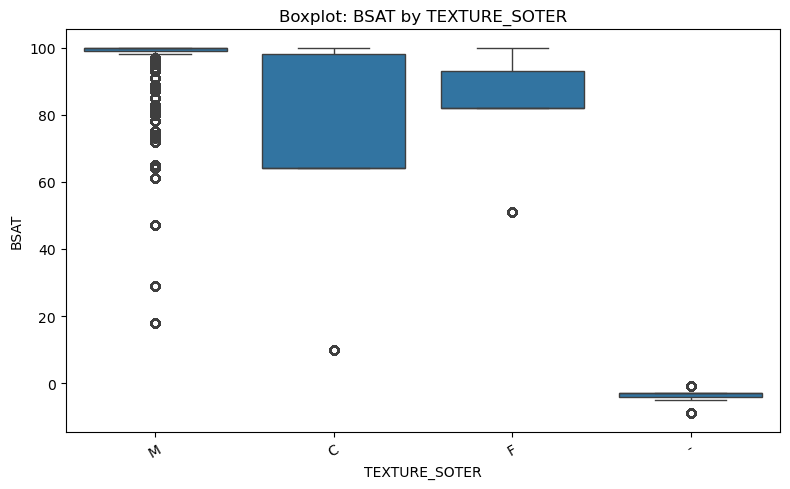

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ALUM_SAT (numerical)
------------------------------------------------------------


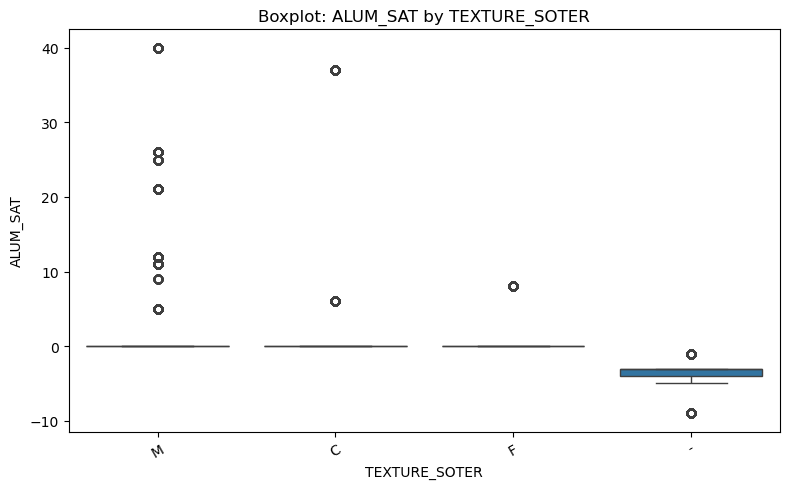

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ESP (numerical)
------------------------------------------------------------


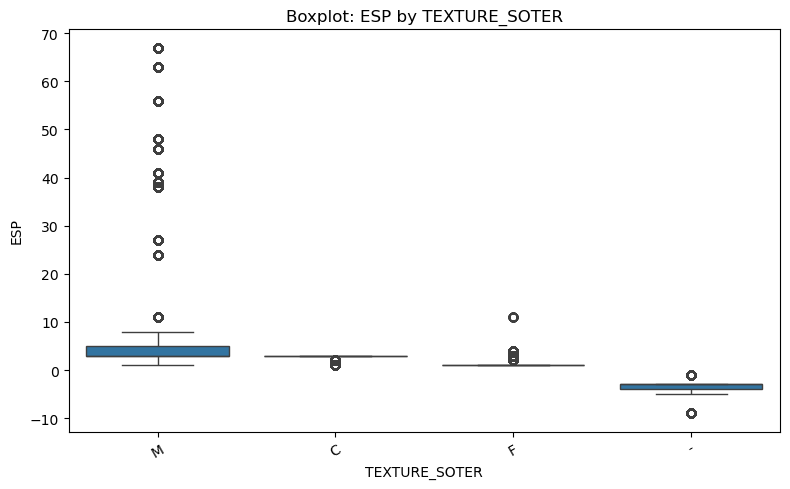

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs TCARBON_EQ (numerical)
------------------------------------------------------------


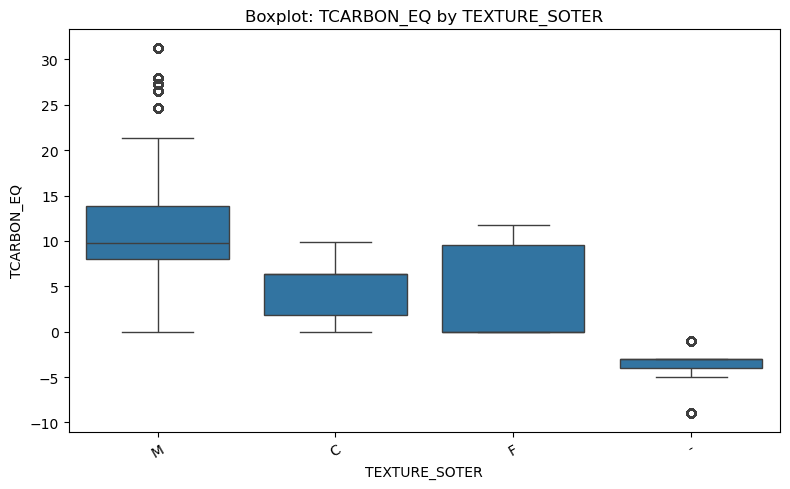

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs GYPSUM (numerical)
------------------------------------------------------------


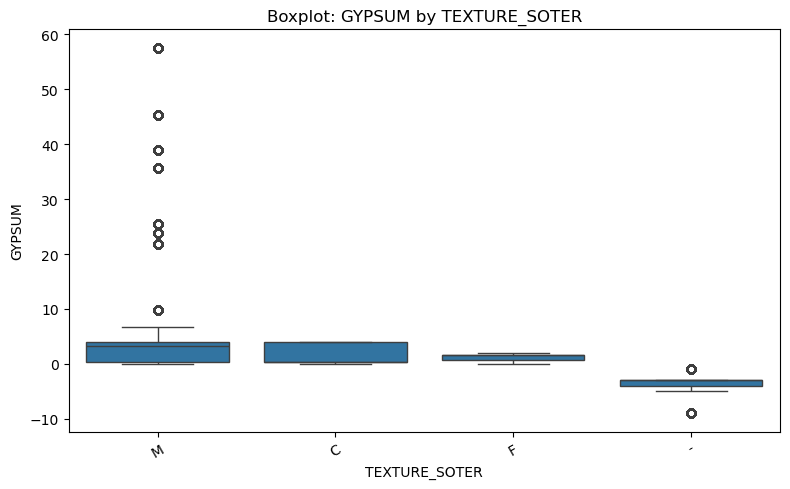

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------

🌿 Bivariate analysis: TEXTURE_SOTER (categorical) vs ELEC_COND (numerical)
------------------------------------------------------------


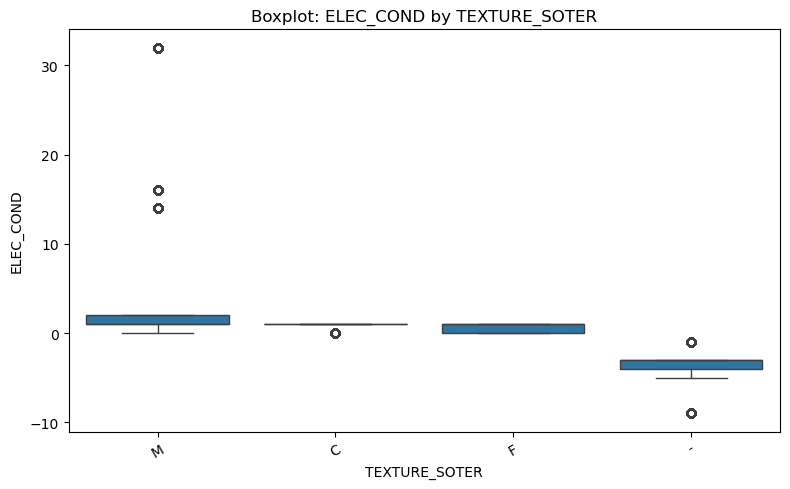

⚠️ More than 2 categories — skipping t-test.
------------------------------------------------------------


In [8]:
# For categorical vs numerical
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        bivariate_analysis(soil_df, cat_col, num_col, type1="categorical", type2="numerical")

## Multivariate Analysis

In [29]:
# coorelation matrix for numerical_cols with lower triangle with spearman 
corr_matrix = soil_df[numerical_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

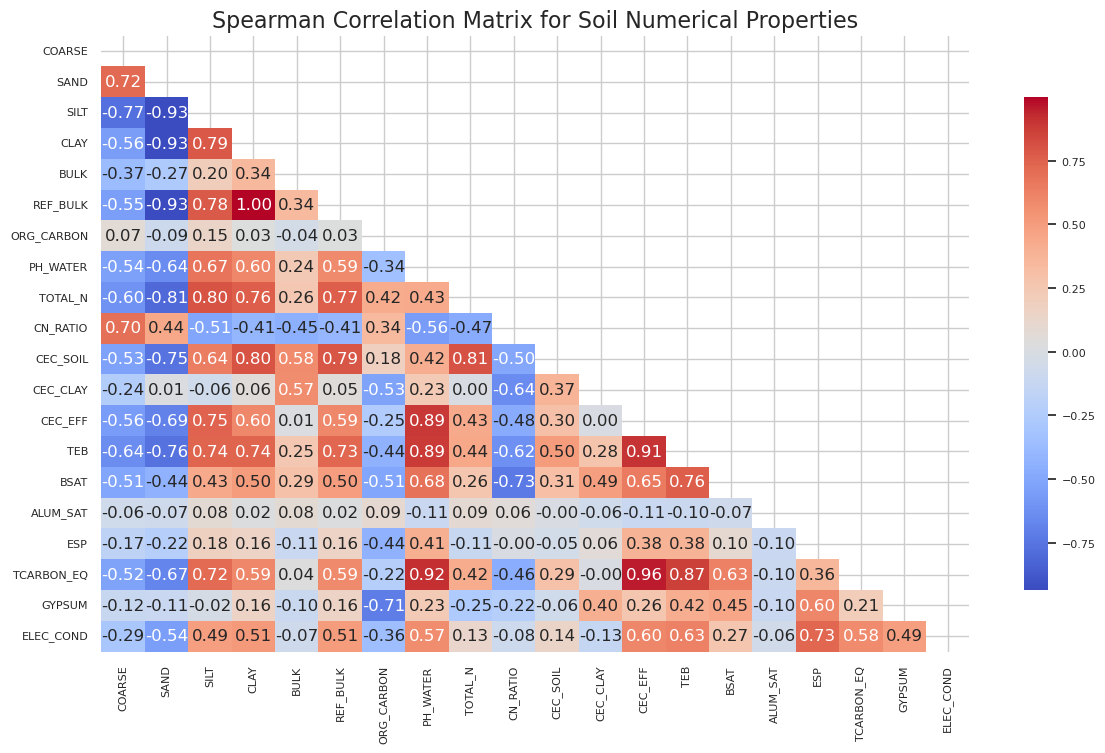

In [30]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Spearman Correlation Matrix for Soil Numerical Properties", fontsize=16)
plt.savefig(os.path.join(Images_dir, f"soil_spearman_correlation_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# coorelation matrix for numerical_cols with lower triangle with pearson
corr_matrix = soil_df[numerical_cols].corr(method='pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

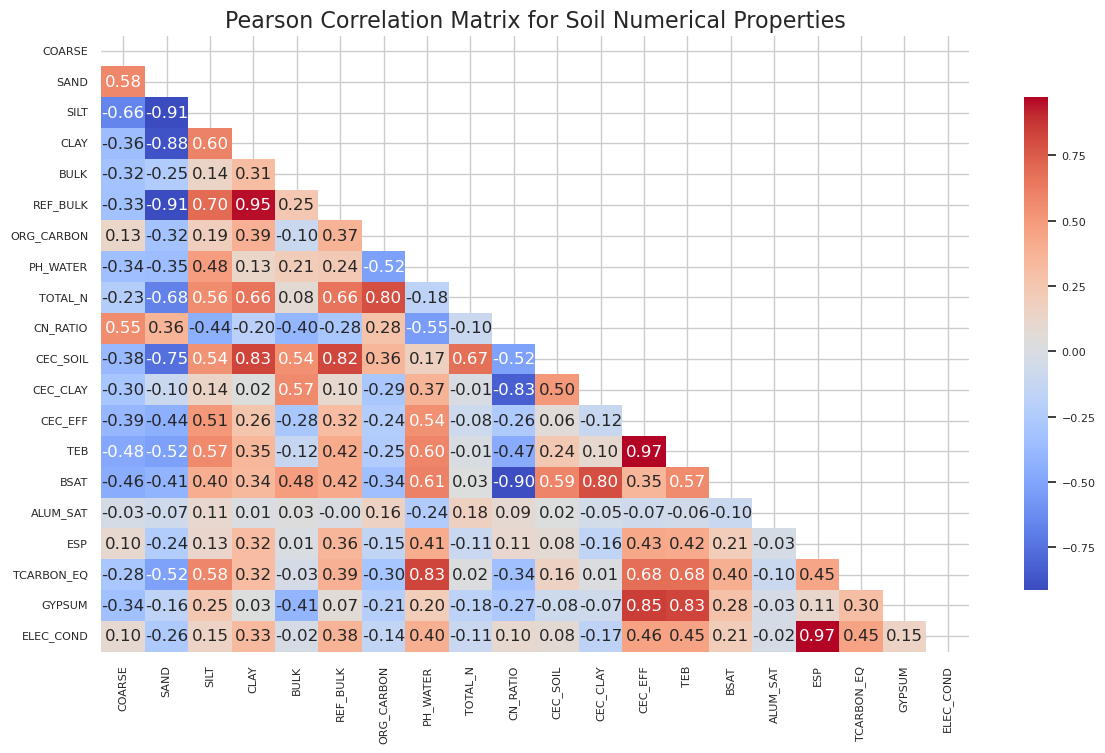

In [32]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Pearson Correlation Matrix for Soil Numerical Properties", fontsize=16)
plt.savefig(os.path.join(Images_dir, f"soil_pearson_correlation_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()